In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import scipy.stats as stats

In [138]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [139]:
house=pd.read_csv('/Users/dylanbai/Desktop/Data Science/Assignments/kc_house_data.csv')

In [140]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [141]:
house.describe(include='all')

id             date         price      bedrooms   
count   2.161300e+04            21613  2.161300e+04  21613.000000  \
unique           NaN              372           NaN           NaN   
top              NaN  20140623T000000           NaN           NaN   
freq             NaN              142           NaN           NaN   
mean    4.580302e+09              NaN  5.400881e+05      3.370842   
std     2.876566e+09              NaN  3.671272e+05      0.930062   
min     1.000102e+06              NaN  7.500000e+04      0.000000   
25%     2.123049e+09              NaN  3.219500e+05      3.000000   
50%     3.904930e+09              NaN  4.500000e+05      3.000000   
75%     7.308900e+09              NaN  6.450000e+05      4.000000   
max     9.900000e+09              NaN  7.700000e+06     33.000000   

           bathrooms   sqft_living      sqft_lot        floors    waterfront   
count   21613.000000  21613.000000  2.161300e+04  21613.000000  21613.000000  \
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        2.114757   2079.899736  1.510697e+04      1.494309      0.007542   
std         0.770163    918.440897  4.142051e+04      0.539989      0.086517   
min         0.000000    290.000000  5.200000e+02      1.000000      0.000000   
25%         1.750000   1427.000000  5.040000e+03      1.000000      0.000000   
50%         2.250000   1910.000000  7.618000e+03      1.500000      0.000000   
75%         2.500000   2550.000000  1.068800e+04      2.000000      0.000000   
max         8.000000  13540.000000  1.651359e+06      3.500000      1.000000   

                view  ...         grade    sqft_above  sqft_basement   
count   21613.000000  ...  21613.000000  21613.000000   21613.000000  \
unique           NaN  ...           NaN           NaN            NaN   
top              NaN  ...           NaN           NaN            NaN   
freq             NaN  ...           NaN           NaN            NaN   
mean        0.234303  ...      7.656873   1788.390691     291.509045   
std         0.766318  ...      1.175459    828.090978     442.575043   
min         0.000000  ...      1.000000    290.000000       0.000000   
25%         0.000000  ...      7.000000   1190.000000       0.000000   
50%         0.000000  ...      7.000000   1560.000000       0.000000   
75%         0.000000  ...      8.000000   2210.000000     560.000000   
max         4.000000  ...     13.000000   9410.000000    4820.000000   

            yr_built  yr_renovated       zipcode           lat          long   
count   21613.000000  21613.000000  21613.000000  21613.000000  21613.000000  \
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean     1971.005136     84.402258  98077.939805     47.560053   -122.213896   
std        29.373411    401.679240     53.505026      0.138564      0.140828   
min      1900.000000      0.000000  98001.000000     47.155900   -122.519000   
25%      1951.000000      0.000000  98033.000000     47.471000   -122.328000   
50%      1975.000000      0.000000  98065.000000     47.571800   -122.230000   
75%      1997.000000      0.000000  98118.000000     47.678000   -122.125000   
max      2015.000000   2015.000000  98199.000000     47.777600   -121.315000   

        sqft_living15     sqft_lot15  
count    21613.000000   21613.000000  
unique            NaN            NaN  
top               NaN            NaN  
freq              NaN            NaN  
mean      1986.552492   12768.455652  
std        685.391304   27304.179631  
min        399.000000     651.000000  
25%       1490.000000    5100.000000  
50%       1840.000000    7620.000000  
75%       23

# we can look into the distribution of the variables of the dataset.

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>]], dtype=object)

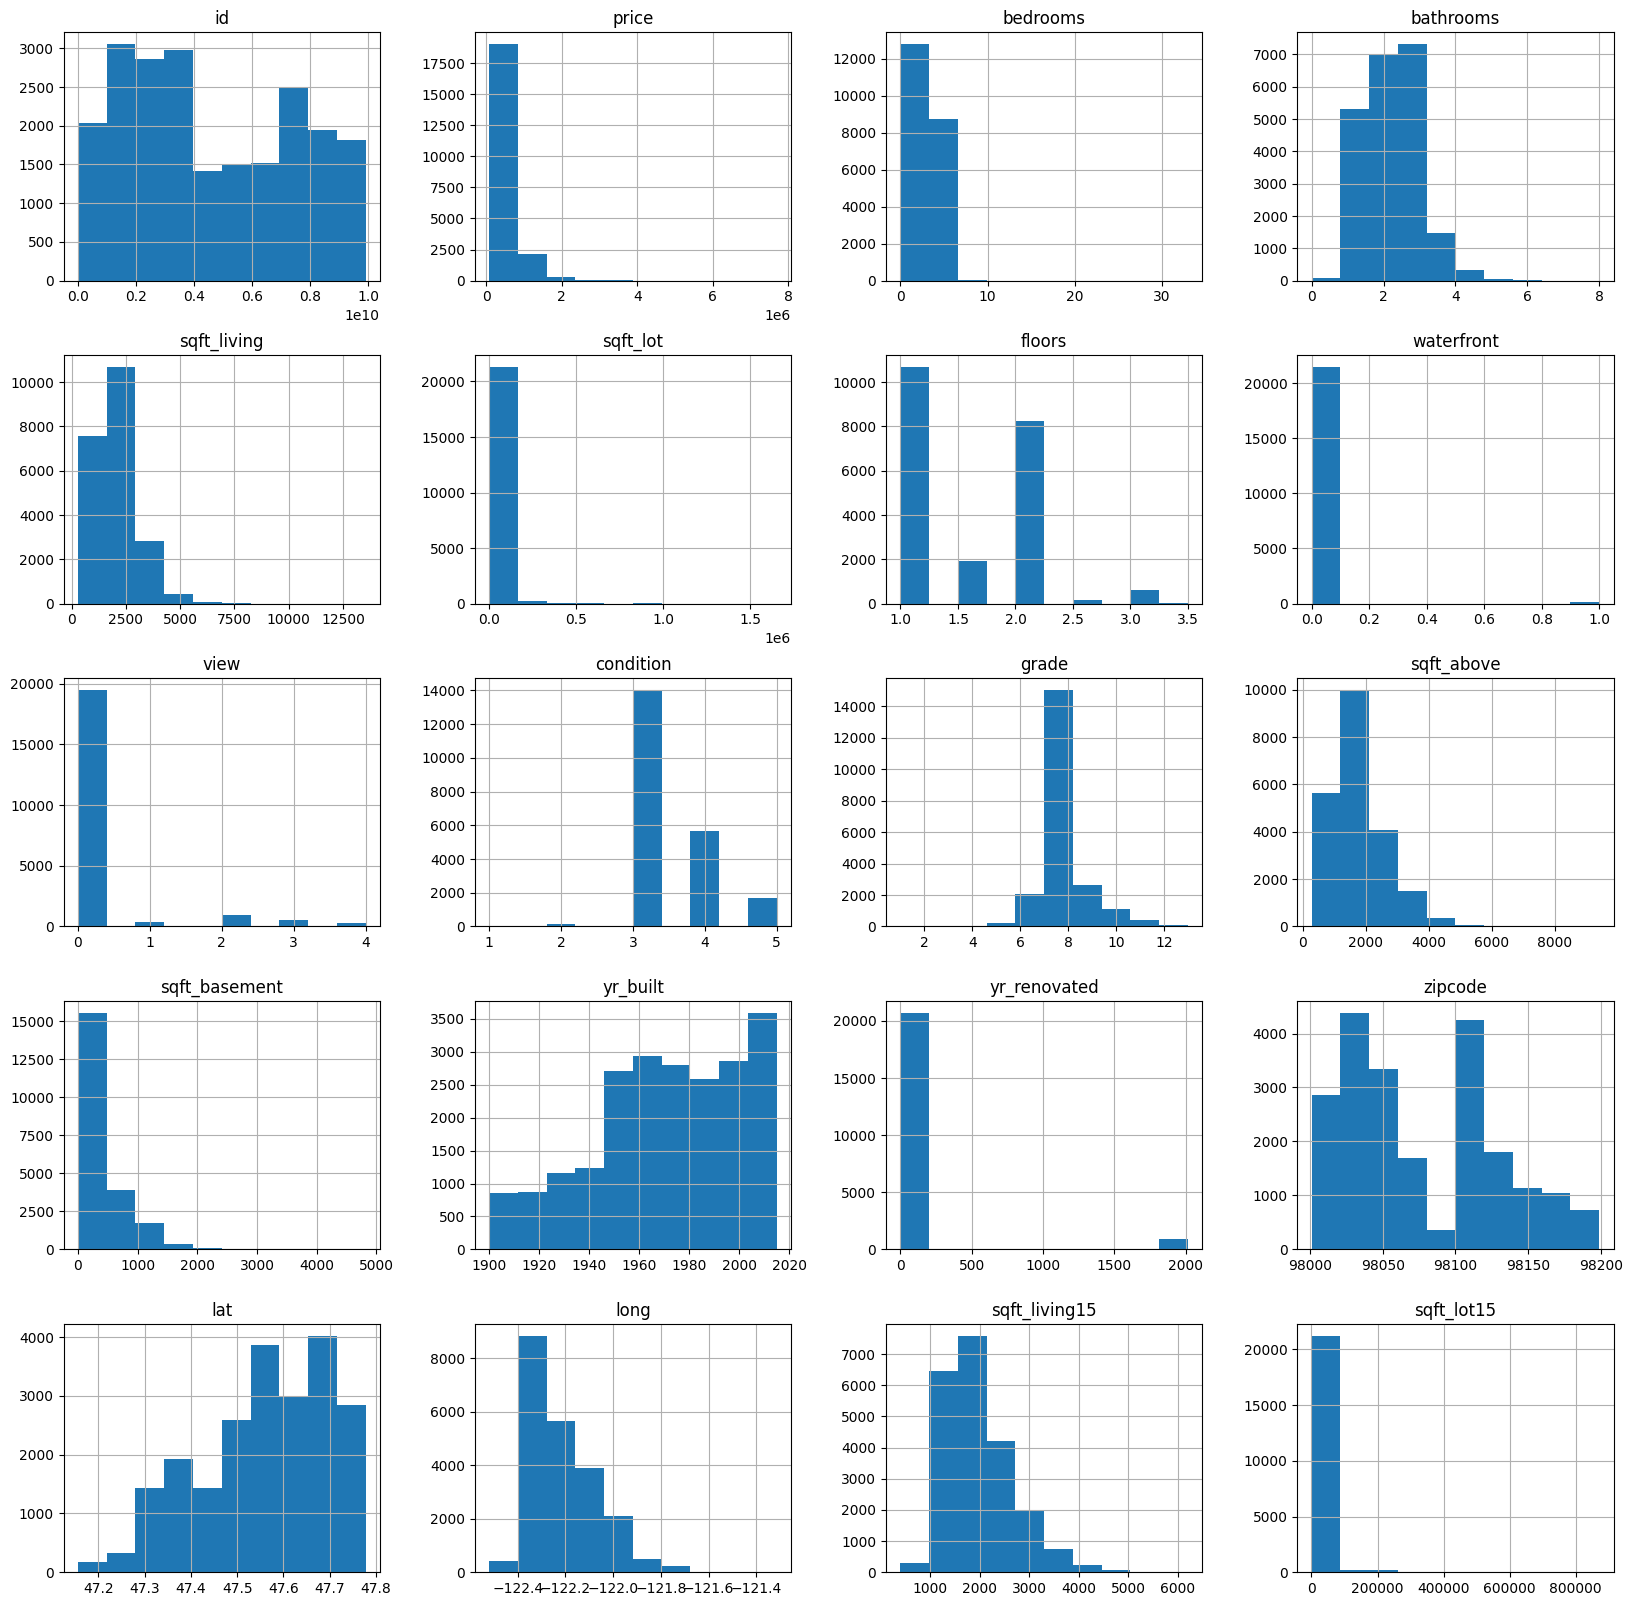

In [142]:
house.hist(figsize=(20,20))

# we can look at the proportion of missing values in each column. No column has a miss value.

In [143]:
for column in house.columns:
    proportion_of_nas = (sum(house[column].isnull())/len(house[column])) * 100 
    print(column, proportion_of_nas)

id 0.0
date 0.0
price 0.0
bedrooms 0.0
bathrooms 0.0
sqft_living 0.0
sqft_lot 0.0
floors 0.0
waterfront 0.0
view 0.0
condition 0.0
grade 0.0
sqft_above 0.0
sqft_basement 0.0
yr_built 0.0
yr_renovated 0.0
zipcode 0.0
lat 0.0
long 0.0
sqft_living15 0.0
sqft_lot15 0.0


# check for outliers in the bedrooms,bathrooms and basement columns to remove the buildings like condo. Some condo can contain lots of rooms and bigger area of basement.

<Axes: ylabel='bedrooms'>

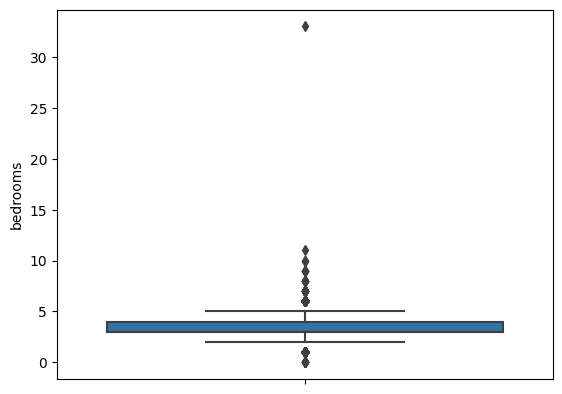

In [144]:
sns.boxplot(data=house,y='bedrooms')

In [145]:
bedrooms_outliers=house[house['bedrooms']>5].index
house.drop(bedrooms_outliers,inplace=True)

<Axes: ylabel='bathrooms'>

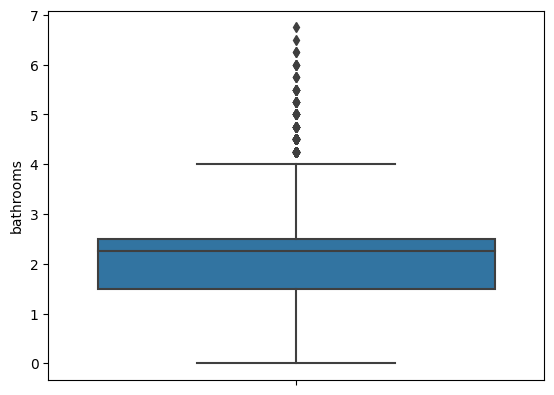

In [146]:
sns.boxplot(data=house,y='bathrooms')

In [147]:
bathrooms_outliers=house[house['bathrooms']>4].index
house.drop(bathrooms_outliers,inplace=True)

<Axes: ylabel='sqft_basement'>

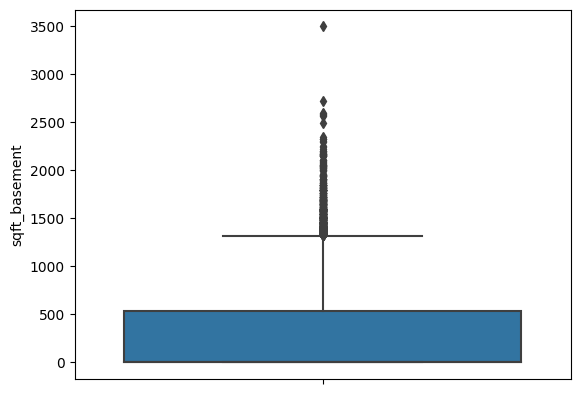

In [148]:
sns.boxplot(data=house,y='sqft_basement')

In [149]:
basement_outliers=house[house['sqft_basement']>2500].index
house.drop(basement_outliers,inplace=True)

In [150]:
house.info()  # we've dropped nearly 600 rows, acceptable.

<class 'pandas.core.frame.DataFrame'>
Index: 21071 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21071 non-null  int64  
 1   date           21071 non-null  object 
 2   price          21071 non-null  float64
 3   bedrooms       21071 non-null  int64  
 4   bathrooms      21071 non-null  float64
 5   sqft_living    21071 non-null  int64  
 6   sqft_lot       21071 non-null  int64  
 7   floors         21071 non-null  float64
 8   waterfront     21071 non-null  int64  
 9   view           21071 non-null  int64  
 10  condition      21071 non-null  int64  
 11  grade          21071 non-null  int64  
 12  sqft_above     21071 non-null  int64  
 13  sqft_basement  21071 non-null  int64  
 14  yr_built       21071 non-null  int64  
 15  yr_renovated   21071 non-null  int64  
 16  zipcode        21071 non-null  int64  
 17  lat            21071 non-null  float64
 18  long       

# Examine the relationship through scatterplot and regresssion line. We try to figure out whether the variables has relationship with the target 'price'.

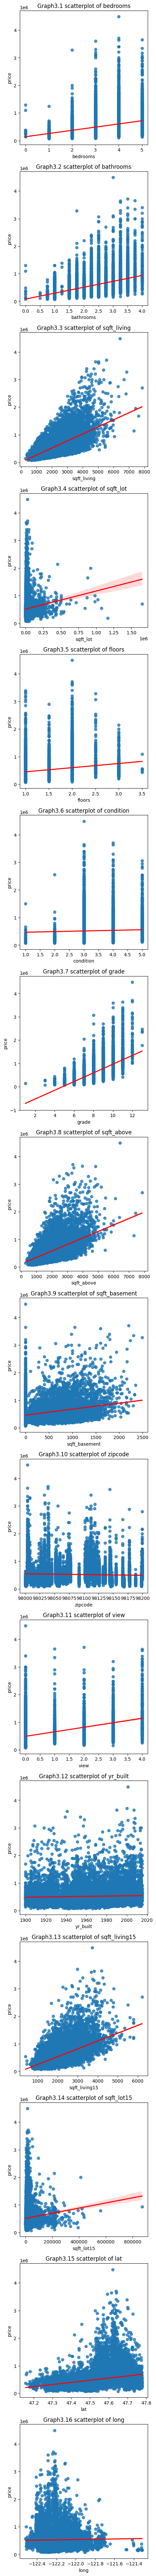

In [151]:
feature = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','grade',\
           'sqft_above','sqft_basement','zipcode','view','yr_built','sqft_living15','sqft_lot15','lat','long']
x=0
fig, axes = plt.subplots(nrows=16, ncols=1, figsize=(5, 100))
for i in feature:
    sns.regplot(data=house, y='price', x=i, line_kws={'color':'red'}, ax=axes[x])
    x += 1
y=1
for i in axes:
    i.set_title(f"Graph3.{y} scatterplot of {feature[y-1]}")
    y += 1

# Actually，there's a variable i expected to have highly related with price,but it doesn't.---condition. The scatterplot shows that the medium grade houses seem to have higher price. But condition maybe has strong relation with yr_built,yr_renovated and grade.
# we can explore more effectively by one-hot encoding the variable. we can create a dummy variable for each condition value.

In [152]:
one_hot = pd.get_dummies(house['condition'], drop_first=True) #drop a column to avoid dummy variable trap
df = house.drop('condition',axis = 1)
df = house.join(one_hot)

<Figure size 640x480 with 0 Axes>

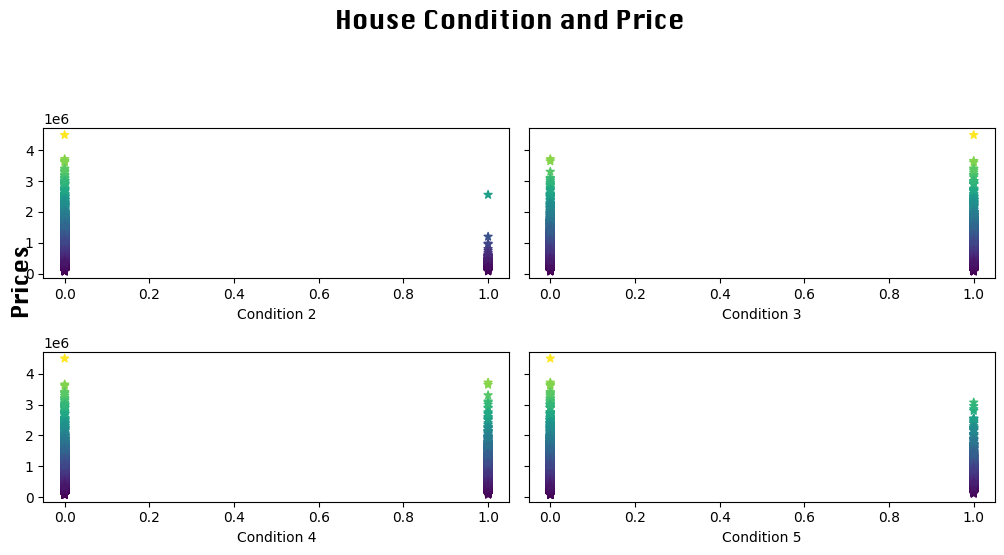

In [153]:
price = house['price']
two = house['two'] = df[2] 
three = house['three'] = df[3] 
four = house['four'] = df[4] 
five = house['five'] = df[5] 

f = plt.figure()
f, axes = plt.subplots(nrows = 2, ncols = 2, sharex=False, sharey = True, figsize=(10,5))

f.suptitle('House Condition and Price', fontsize=18, y=1.1, fontname='Silom')
f.text(0.0001, 0.56, 'Prices', va='center', rotation='vertical', fontsize=16, fontname='Silom')

sc = axes[0][0].scatter(two, price, c = price, marker = "*")
axes[0][0].set_xlabel('Condition 2')

axes[0][1].scatter(three, price, c = price, marker = "*")
axes[0][1].set_xlabel('Condition 3')

axes[1][0].scatter(four, price, c = price, marker = "*")
axes[1][0].set_xlabel('Condition 4')

axes[1][1].scatter(five, price, c = price, marker = "*")
axes[1][1].set_xlabel('Condition 5')


f.tight_layout()
plt.show()

# condition rating 2&3 are having the most pronounced linear relationship.

# Before we try to find out the variables whhich are most strongly correlated with the price, we shouled create a correlation matrix of price and continuous variables in the dataset to visualize correlations. Because we do not want to have multicollinearity among the explanatory variables when we are building multiple linear regression model.

<Axes: >

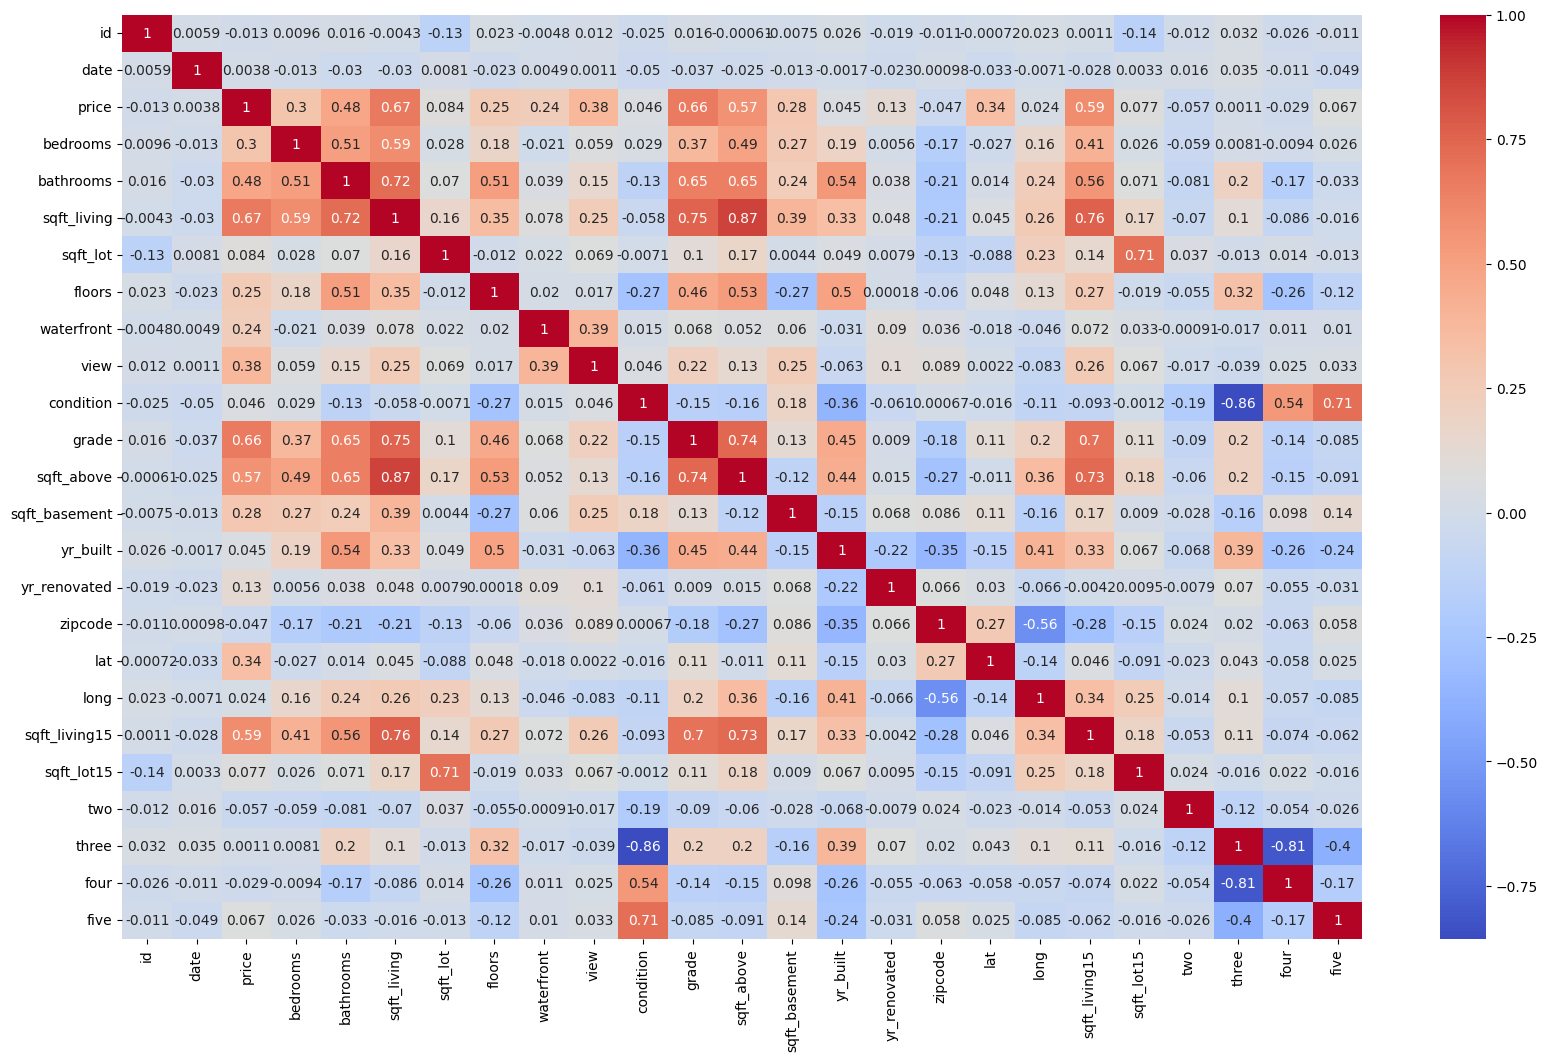

In [154]:
house['date']=pd.to_datetime(house['date'])
plt.figure(figsize=(20,12))
sns.heatmap(house.corr(),cmap='coolwarm',annot=True)

In [155]:
corr = house.corr().abs()
features = []
correlations = []
for idx, correlation in corr['price'].T.items():
    if correlation >= .30 and idx != 'price':
        features.append(idx)
        correlations.append(correlation)
corr_price_df = pd.DataFrame({'Correlations':correlations, 'Features': features}).sort_values(by=['Correlations'],ascending=False)

In [156]:
Multicollinear_Features = []
Multicollinear_Corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.items():
        if correlation >= .80 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame({'Correlations':Multicollinear_Corr, 'Features': Multicollinear_Features}).sort_values(by=['Correlations'],ascending=False)

In [157]:
print('Correlations with Price')
display(corr_price_df)
print('Multicollinear Features')
display(MC_df)

Correlations with Price


Correlations       Features
1      0.670438    sqft_living
3      0.662923          grade
6      0.590684  sqft_living15
4      0.569973     sqft_above
0      0.475050      bathrooms
2      0.376692           view
5      0.336798            lat

Multicollinear Features


Correlations                   Features
0      0.866974  [sqft_living, sqft_above]
2      0.866974  [sqft_above, sqft_living]
1      0.855974         [condition, three]
3      0.855974         [three, condition]
4      0.812070              [three, four]
5      0.812070              [four, three]

# from the information above, Sqft_living, grade, sqft_living15, sqft_above and bathrooms have the highest correlations with price.
# sqft_living and sqft_above are both highly correlated with price, only one of them can be included in a multiple regression model because they are also highly correlated with each other. 

# Linear regression analysis assumes that the relationship between explanatory and response variables is linear. we can make some scatterplots to visually explore the relationship between these variables and price.

In [158]:
price = house['price']
bath = house['bathrooms']
bed = house['bedrooms']
grade = house['grade']
sqft_living15 = house['sqft_living15']
floors = house['floors']
view = house['view']
sqft_living = house['sqft_living']
sqft_above = house['sqft_above']

/var/folders/xg/p7xsrph1757b22c90718xp3m0000gn/T/ipykernel_49273/363582270.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f.tight_layout()


<Figure size 640x480 with 0 Axes>

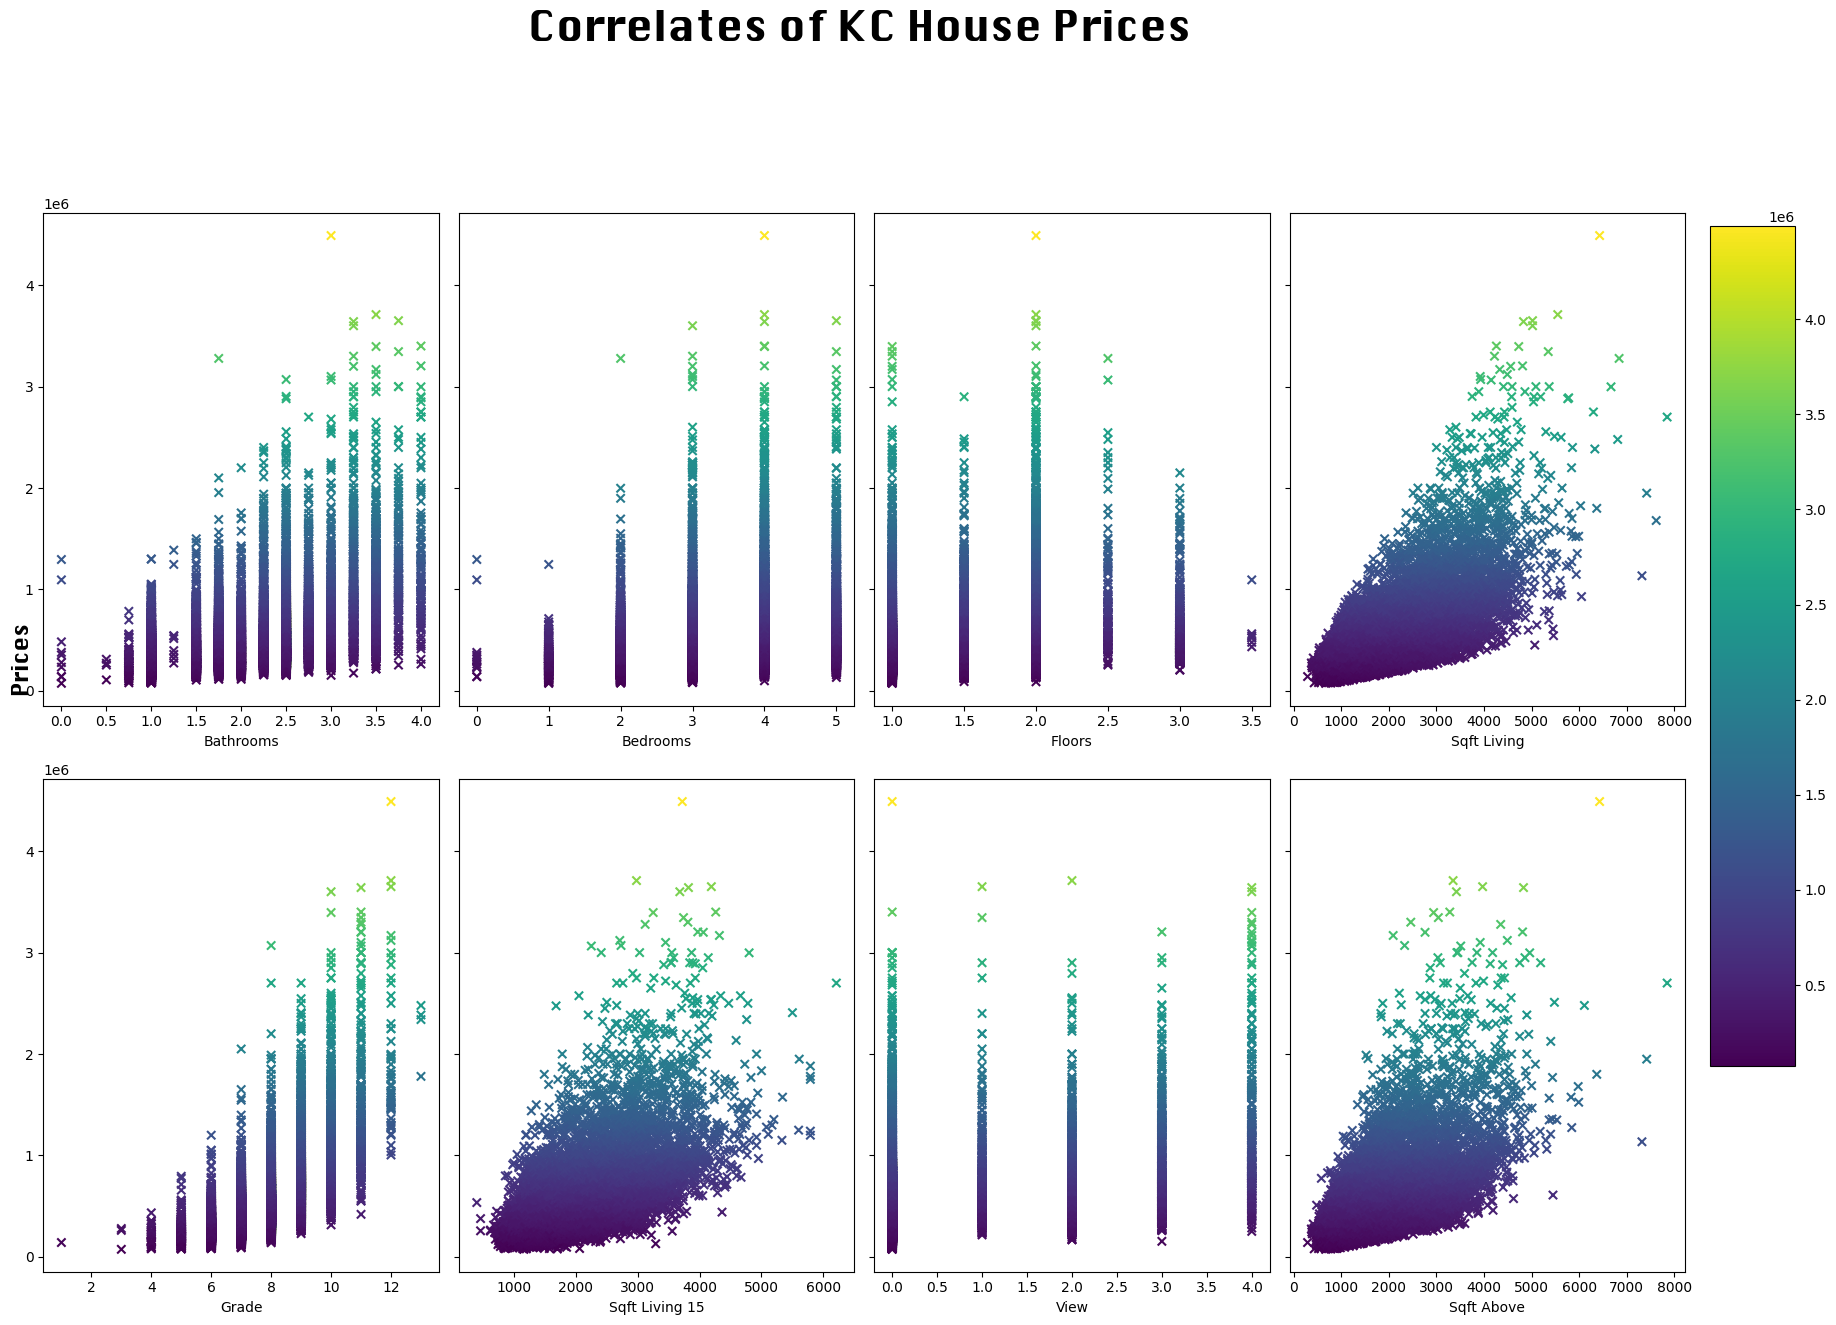

In [192]:
f = plt.figure()
f, axes = plt.subplots(nrows = 2, ncols = 4, sharex=False, sharey = True, figsize=(17,12))

f.suptitle('Correlates of KC House Prices', fontsize=30, y=1.1, fontname='Silom')
f.text(0.0001, 0.56, 'Prices', va='center', rotation='vertical', fontsize=16, fontname='Silom')

sc = axes[0][0].scatter(bath, price, c = price, marker = "x")
axes[0][0].set_xlabel('Bathrooms')

axes[0][1].scatter(bed, price, c = price, marker = "x")
axes[0][1].set_xlabel('Bedrooms')

axes[1][0].scatter(grade, price, c = price, marker = "x")
axes[1][0].set_xlabel('Grade')

axes[1][1].scatter(sqft_living15, price, c = price, marker = "x")
axes[1][1].set_xlabel('Sqft Living 15')

axes[0][2].scatter(floors, price, c = price, marker = "x")
axes[0][2].set_xlabel('Floors')

axes[1][2].scatter(view, price, c = price, marker = "x")
axes[1][2].set_xlabel('View')

sc = axes[0][3].scatter(sqft_living, price, c = price, marker = "x")
axes[0][3].set_xlabel('Sqft Living')

sc = axes[1][3].scatter(sqft_above, price, c = price, marker = "x")
axes[1][3].set_xlabel('Sqft Above')

cbar_ax = f.add_axes([1, 0.22, 0.05, 0.7])

f.colorbar(sc, cax=cbar_ax)

f.tight_layout()
plt.show()

# from the informations above, Sqft living has a stronger linear relationship with price than sqft above, so it will be used in the multiple regression model.

# Time to build a multiple regression model for predicting, but there are 3 assumptions about the data that must be checked before building any simple linear regression model:
# There should be a linear relationship between the explanatory and response variables.(checked)
# The data should be homoscedastic .
# The model residuals should follow a normal distribution.
# let's check these by simple linear regression.


In [160]:
def model_diagnostic(model, x, x_name, y):
    
    residuals = model.resid
    
    f = plt.figure()
    f, axes = plt.subplots(nrows = 1, ncols = 3, sharex=False, sharey = False, figsize=(65,20), squeeze=False)
    
    f.text(s="Model Diagnostic Summary", x=.40, y=1.15, fontsize=65, fontname='silom')
    f.text(s="r-Squared: {r}".format(r=round(model.rsquared, 2)), x=.40, y=1.05, fontsize=50, fontname='serif')
    f.text(s="p-value: {p}".format(p= model.f_pvalue), x=.53, y=1.05, fontsize=50, fontname='serif')
    
    f.text(s='Residuals Histogram', x=.45, y=.93, fontsize=55, fontname='serif')
    
    sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax=axes[0][0])    
    plt.show;
    
    f.text(s='QQ Plot', x=.20, y=.93, fontsize=55, fontname='serif')
    
    axes[0][1].hist(residuals)
    plt.show;
    
    sns.residplot(x=x, y=y, ax=axes[0][2])
 
    f.text(s='Residuals vs {x}'.format(x=x_name), x=.73, y=.93, fontsize=55, fontname='serif')
    plt.tight_layout;
    plt.show;

# Check the variable---'sqft_living':


<Figure size 640x480 with 0 Axes>

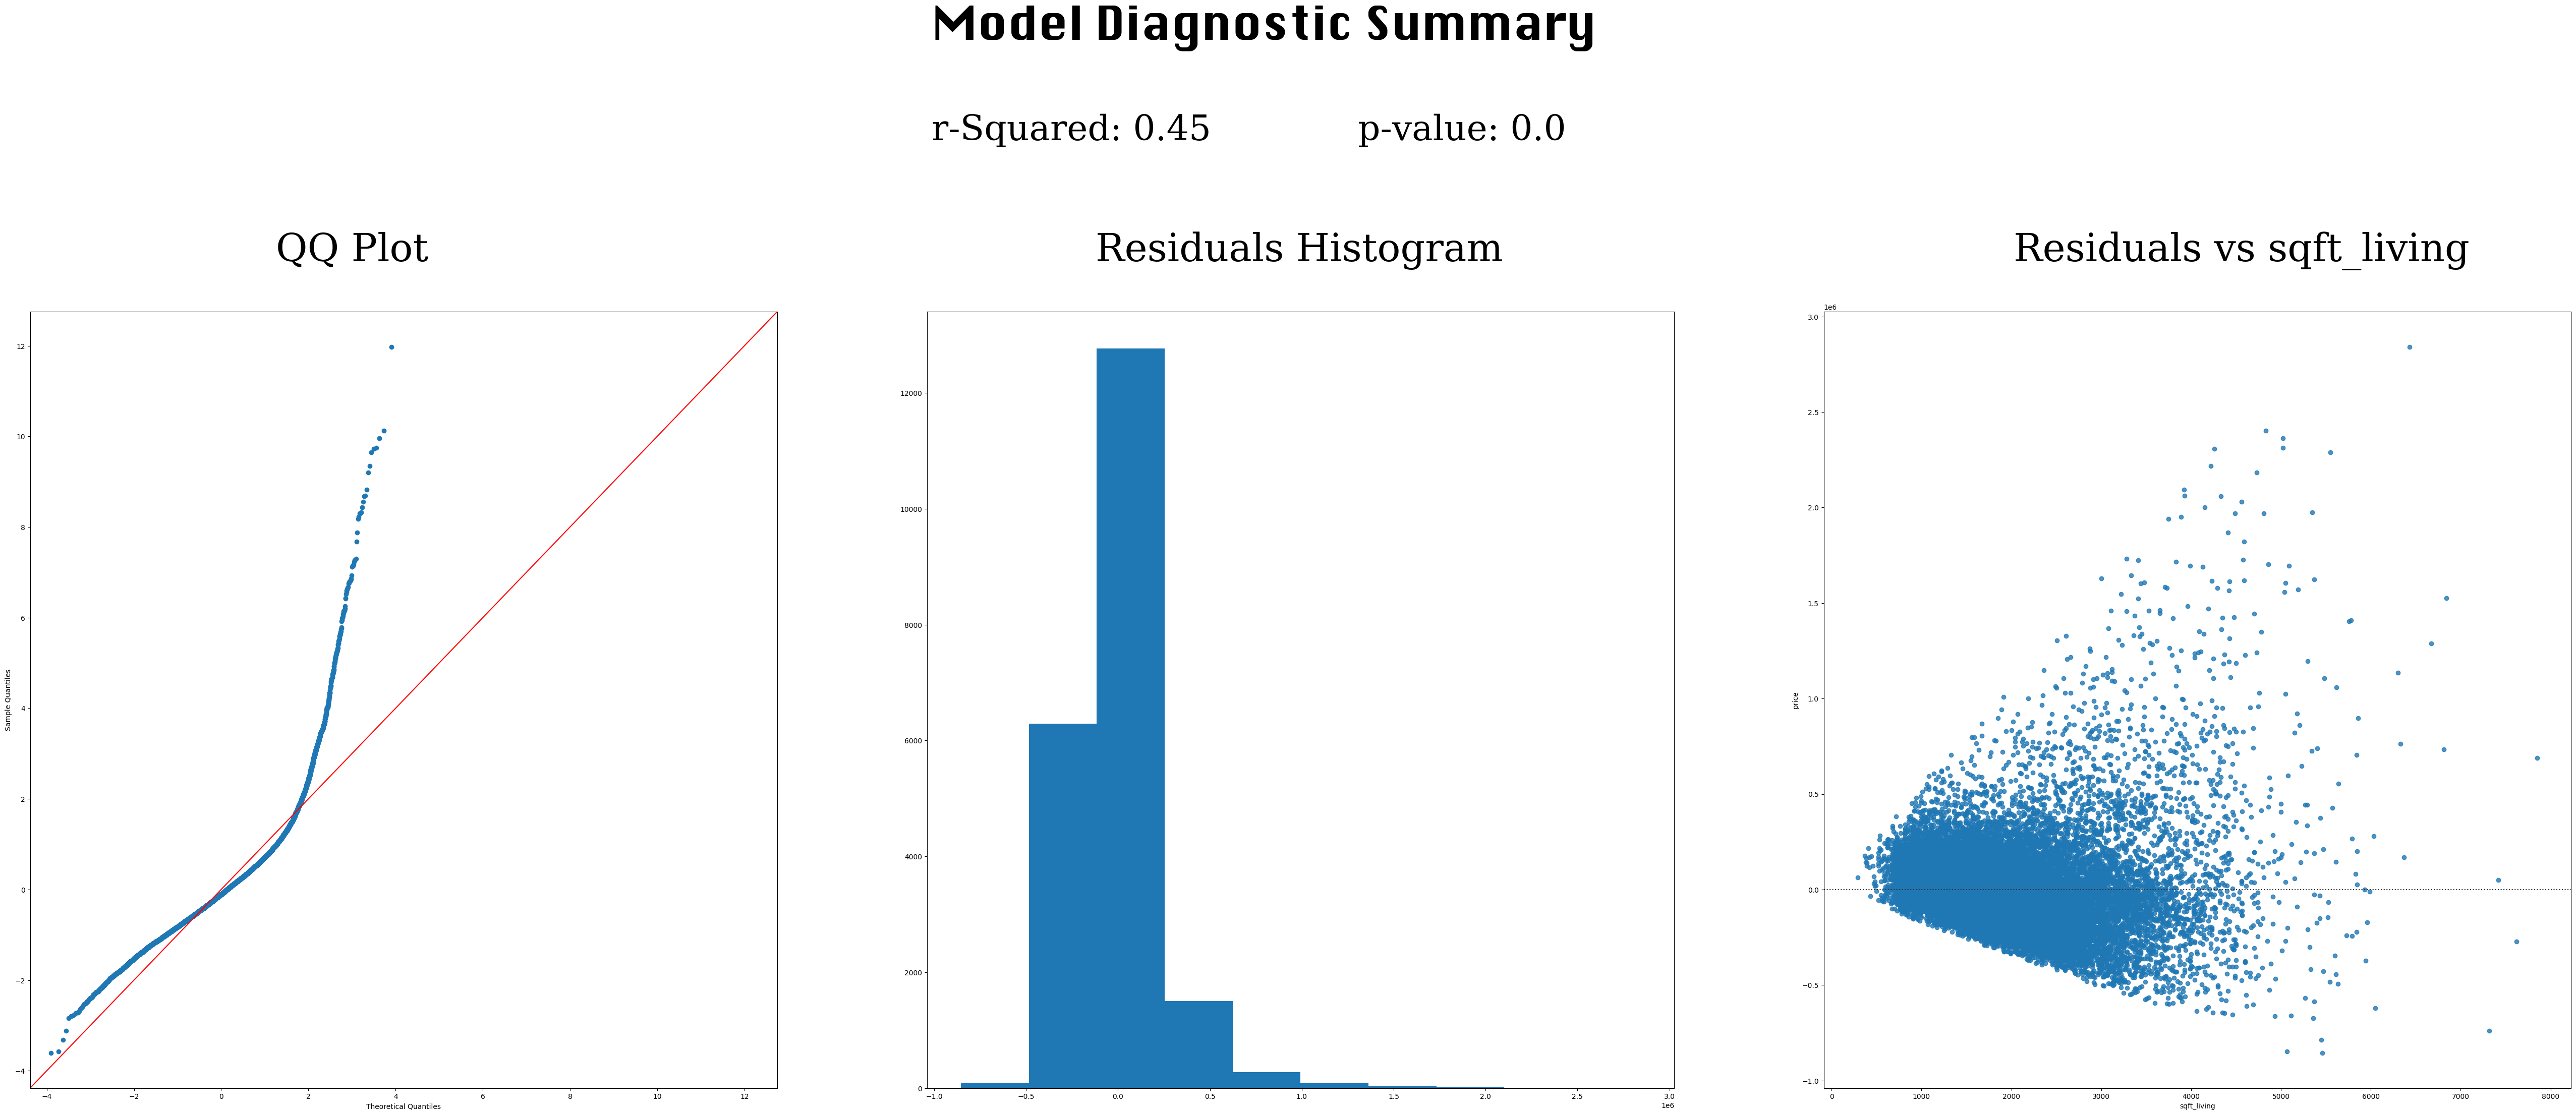

In [161]:
f = 'price~sqft_living'
sqft_living_model = smf.ols(formula=f, data=house).fit()
model_diagnostic(sqft_living_model, sqft_living, 'sqft_living', price)

# from the information above,the homoscedasticity and normality assumptions are violated.
# we can use log-transformation to fix it.

In [162]:
house['price_log'] = np.log(house['price'])
house['sqft_living_log'] = np.log(house['sqft_living'])

<Figure size 640x480 with 0 Axes>

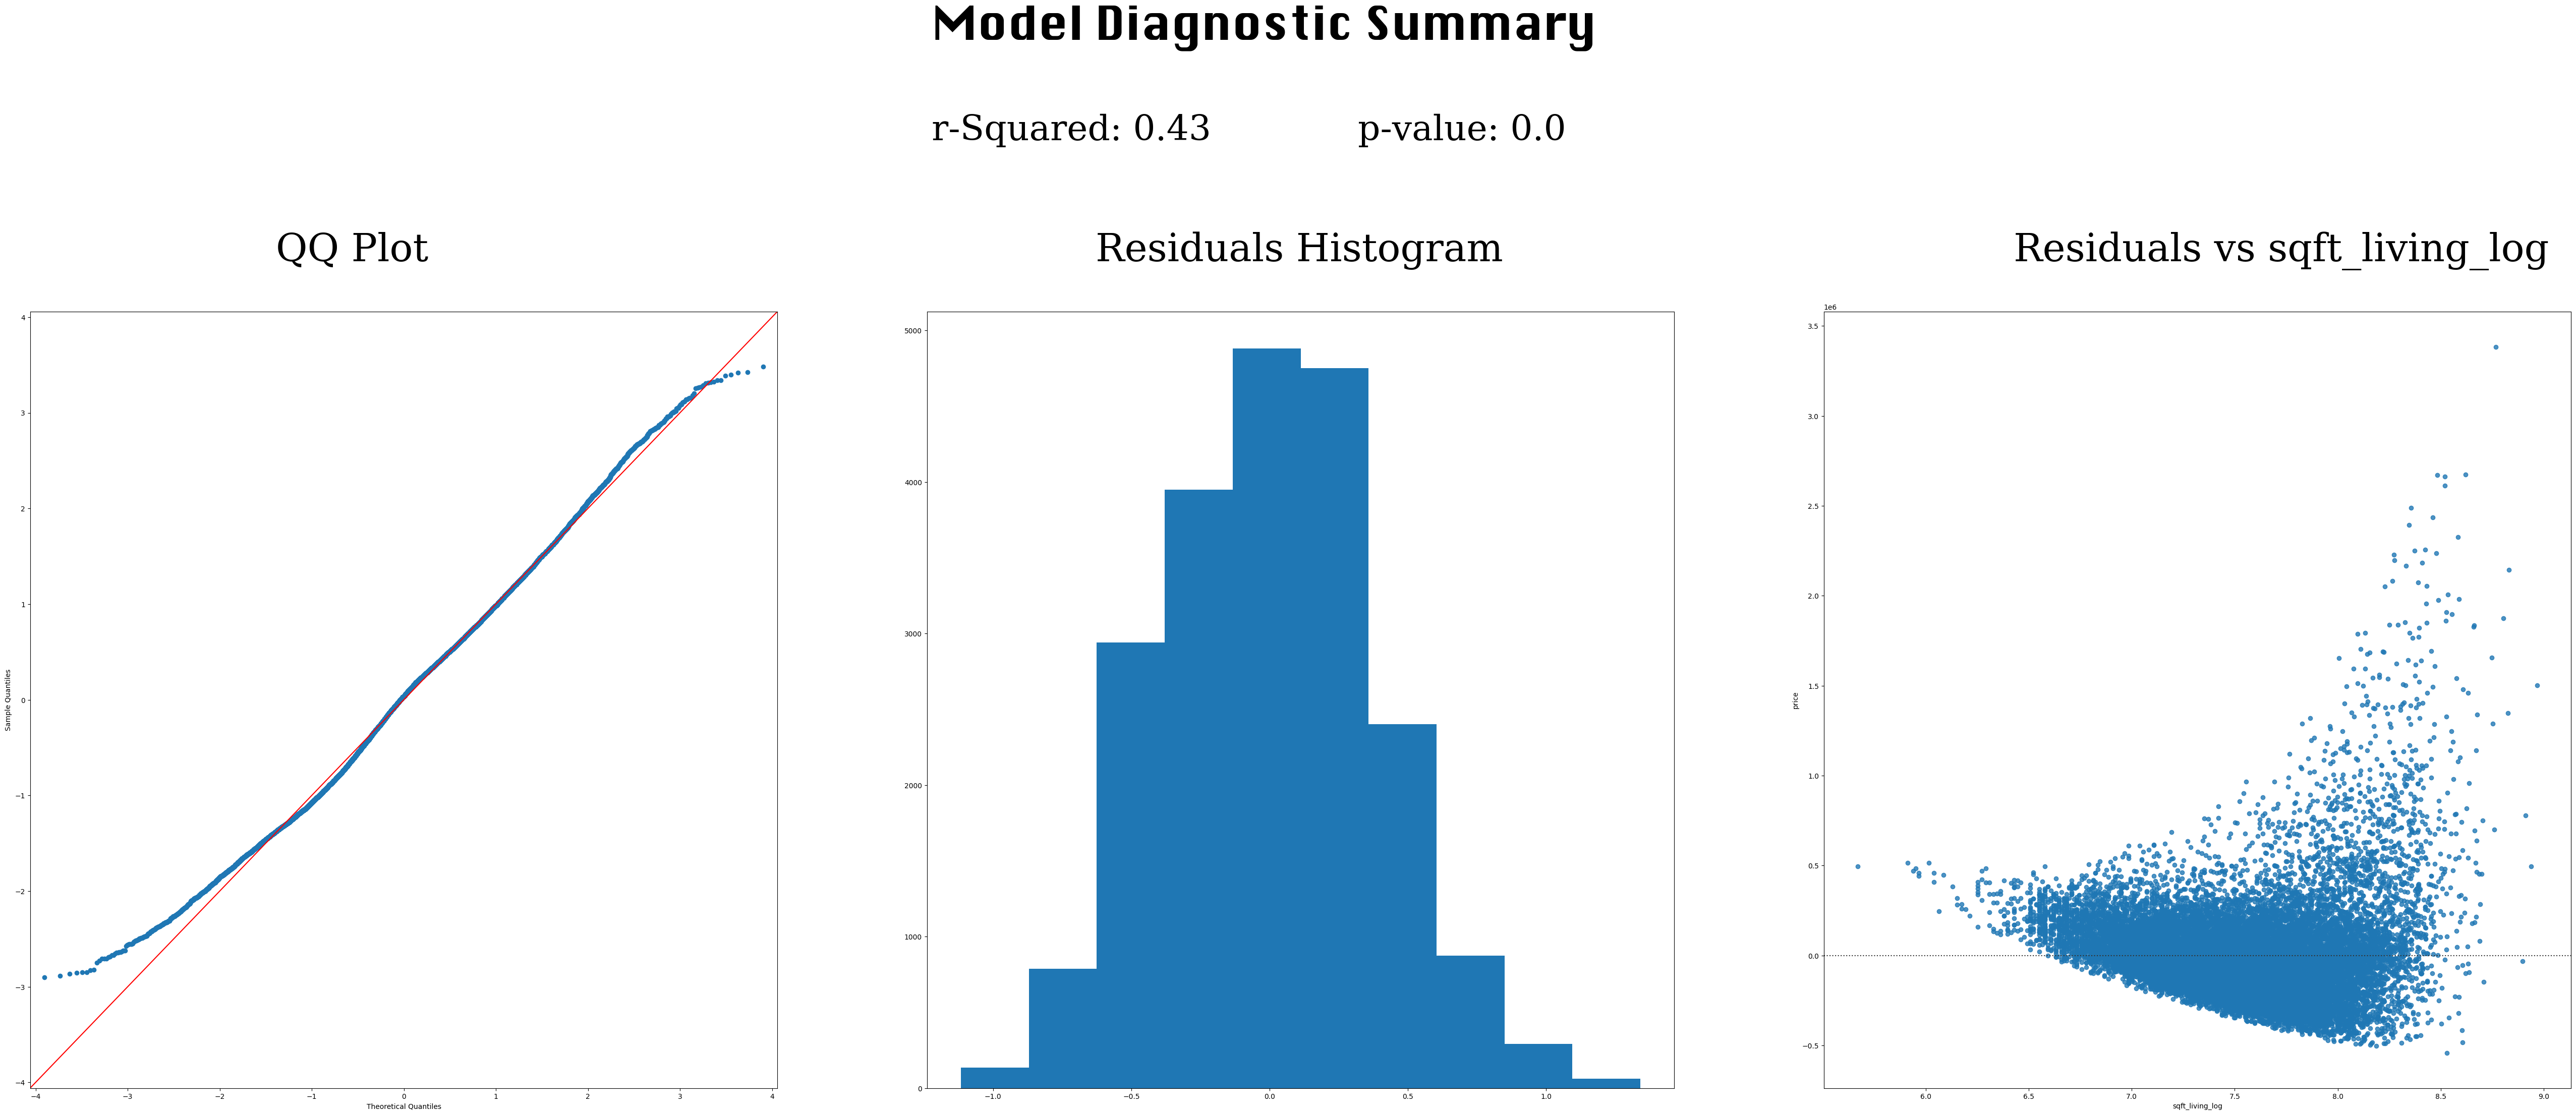

In [163]:
f = 'price_log~sqft_living_log'
sqft_living_model = smf.ols(formula=f, data=house).fit()
model_diagnostic(sqft_living_model, house['sqft_living_log'], 'sqft_living_log', price)

# check the variable---'sqft_living_15':

<Figure size 640x480 with 0 Axes>

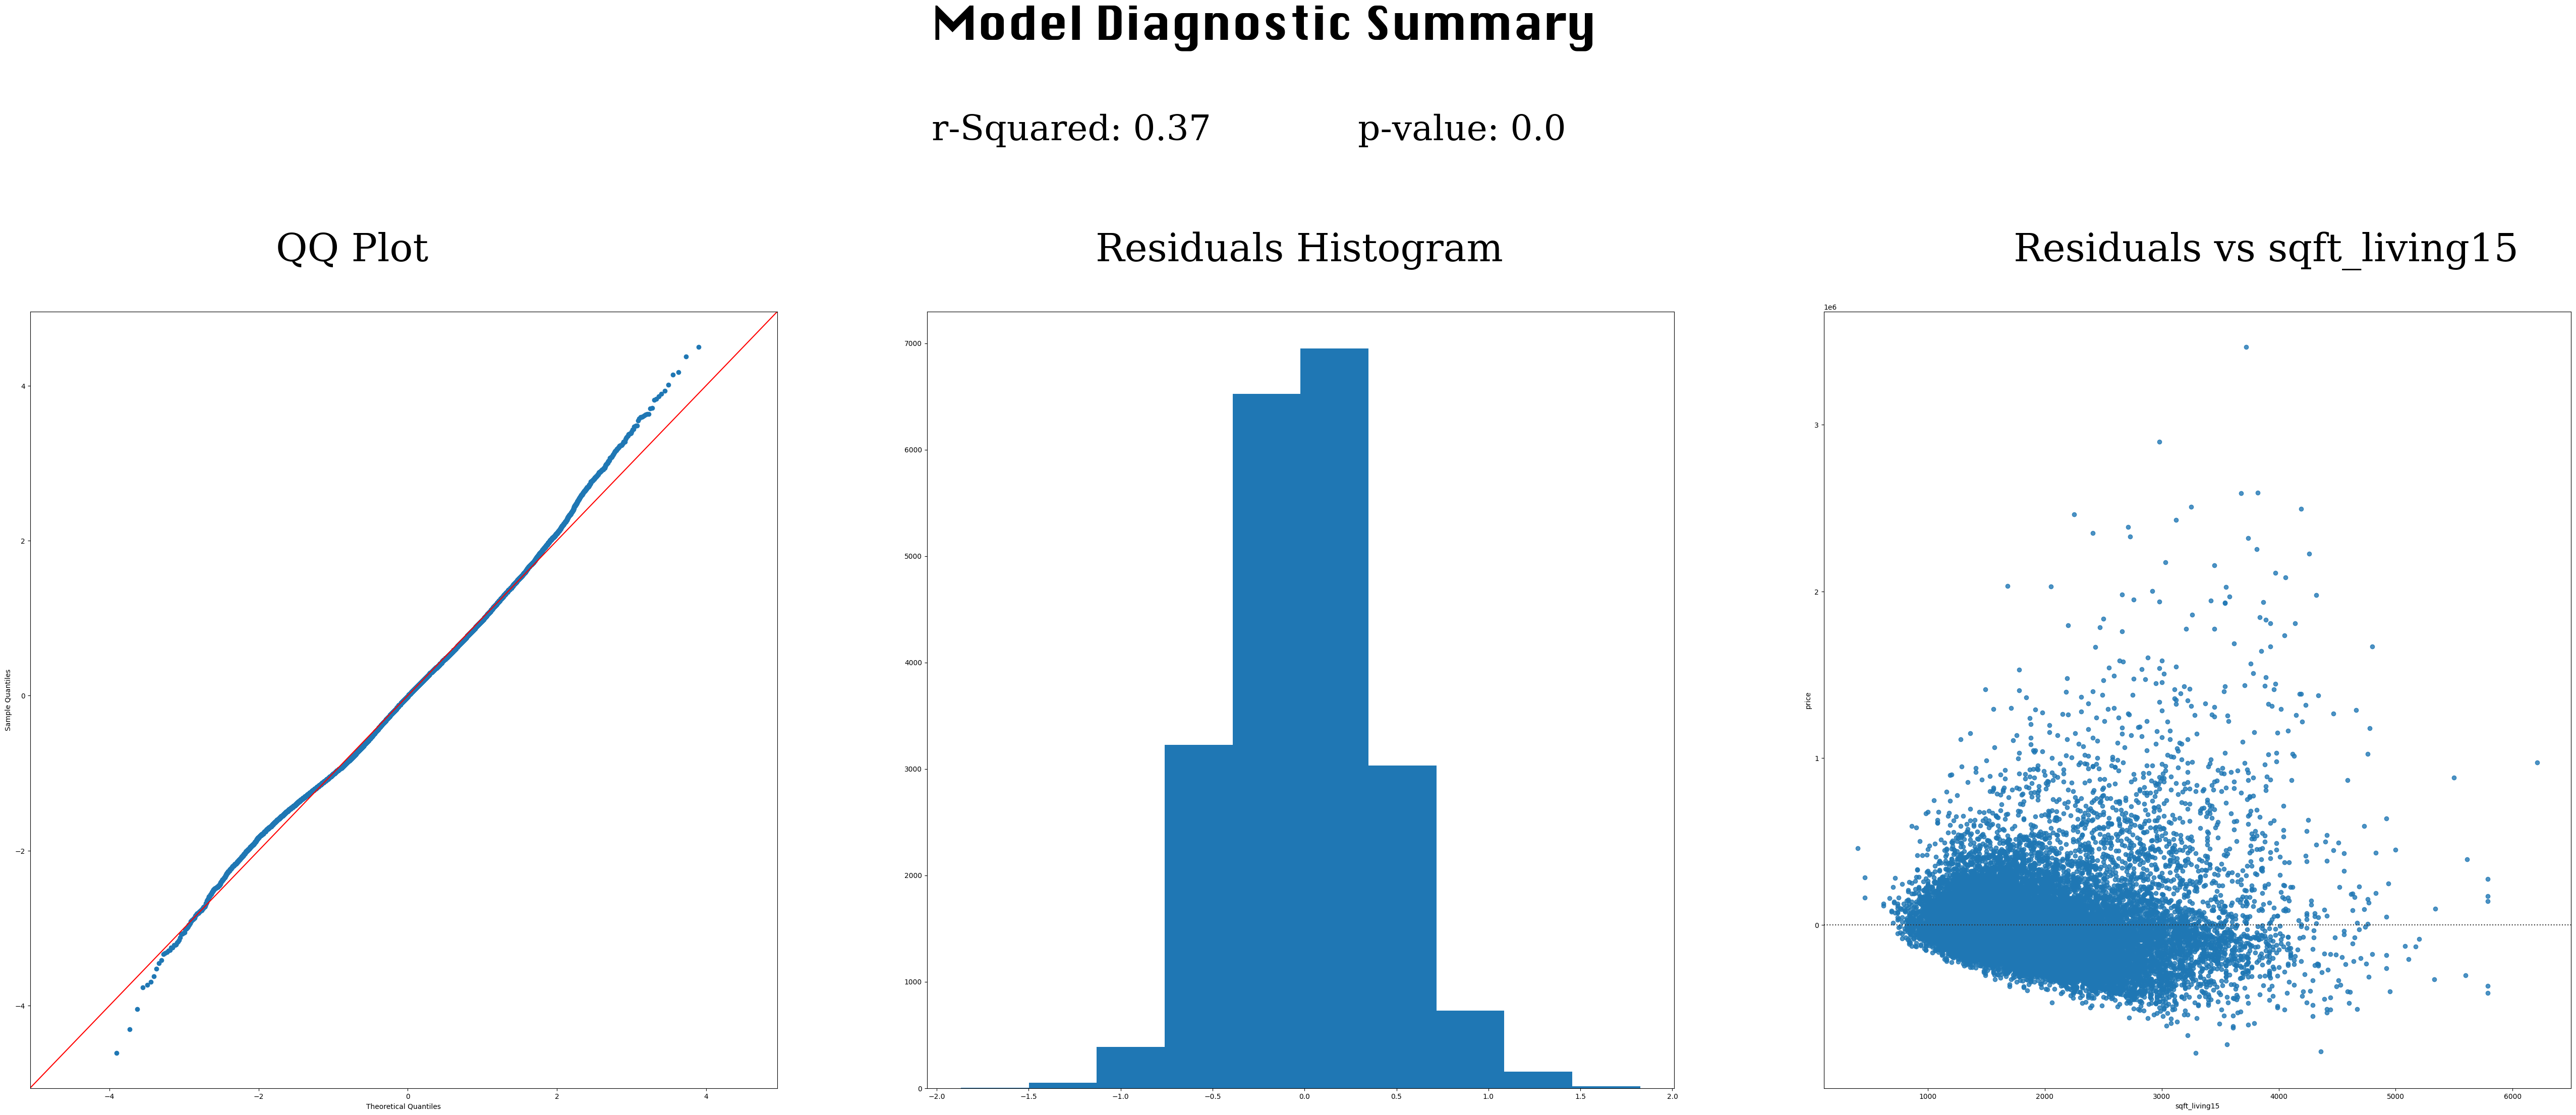

In [164]:
f = 'price_log~sqft_living15'
sqft15_model = smf.ols(formula=f, data=house).fit()
model_diagnostic(sqft15_model, sqft_living15, 'sqft_living15', price)

# the homoscedasticity assumption is violated.

In [165]:
house['sqft_living15_log'] = np.log(house['sqft_living15'])

<Figure size 640x480 with 0 Axes>

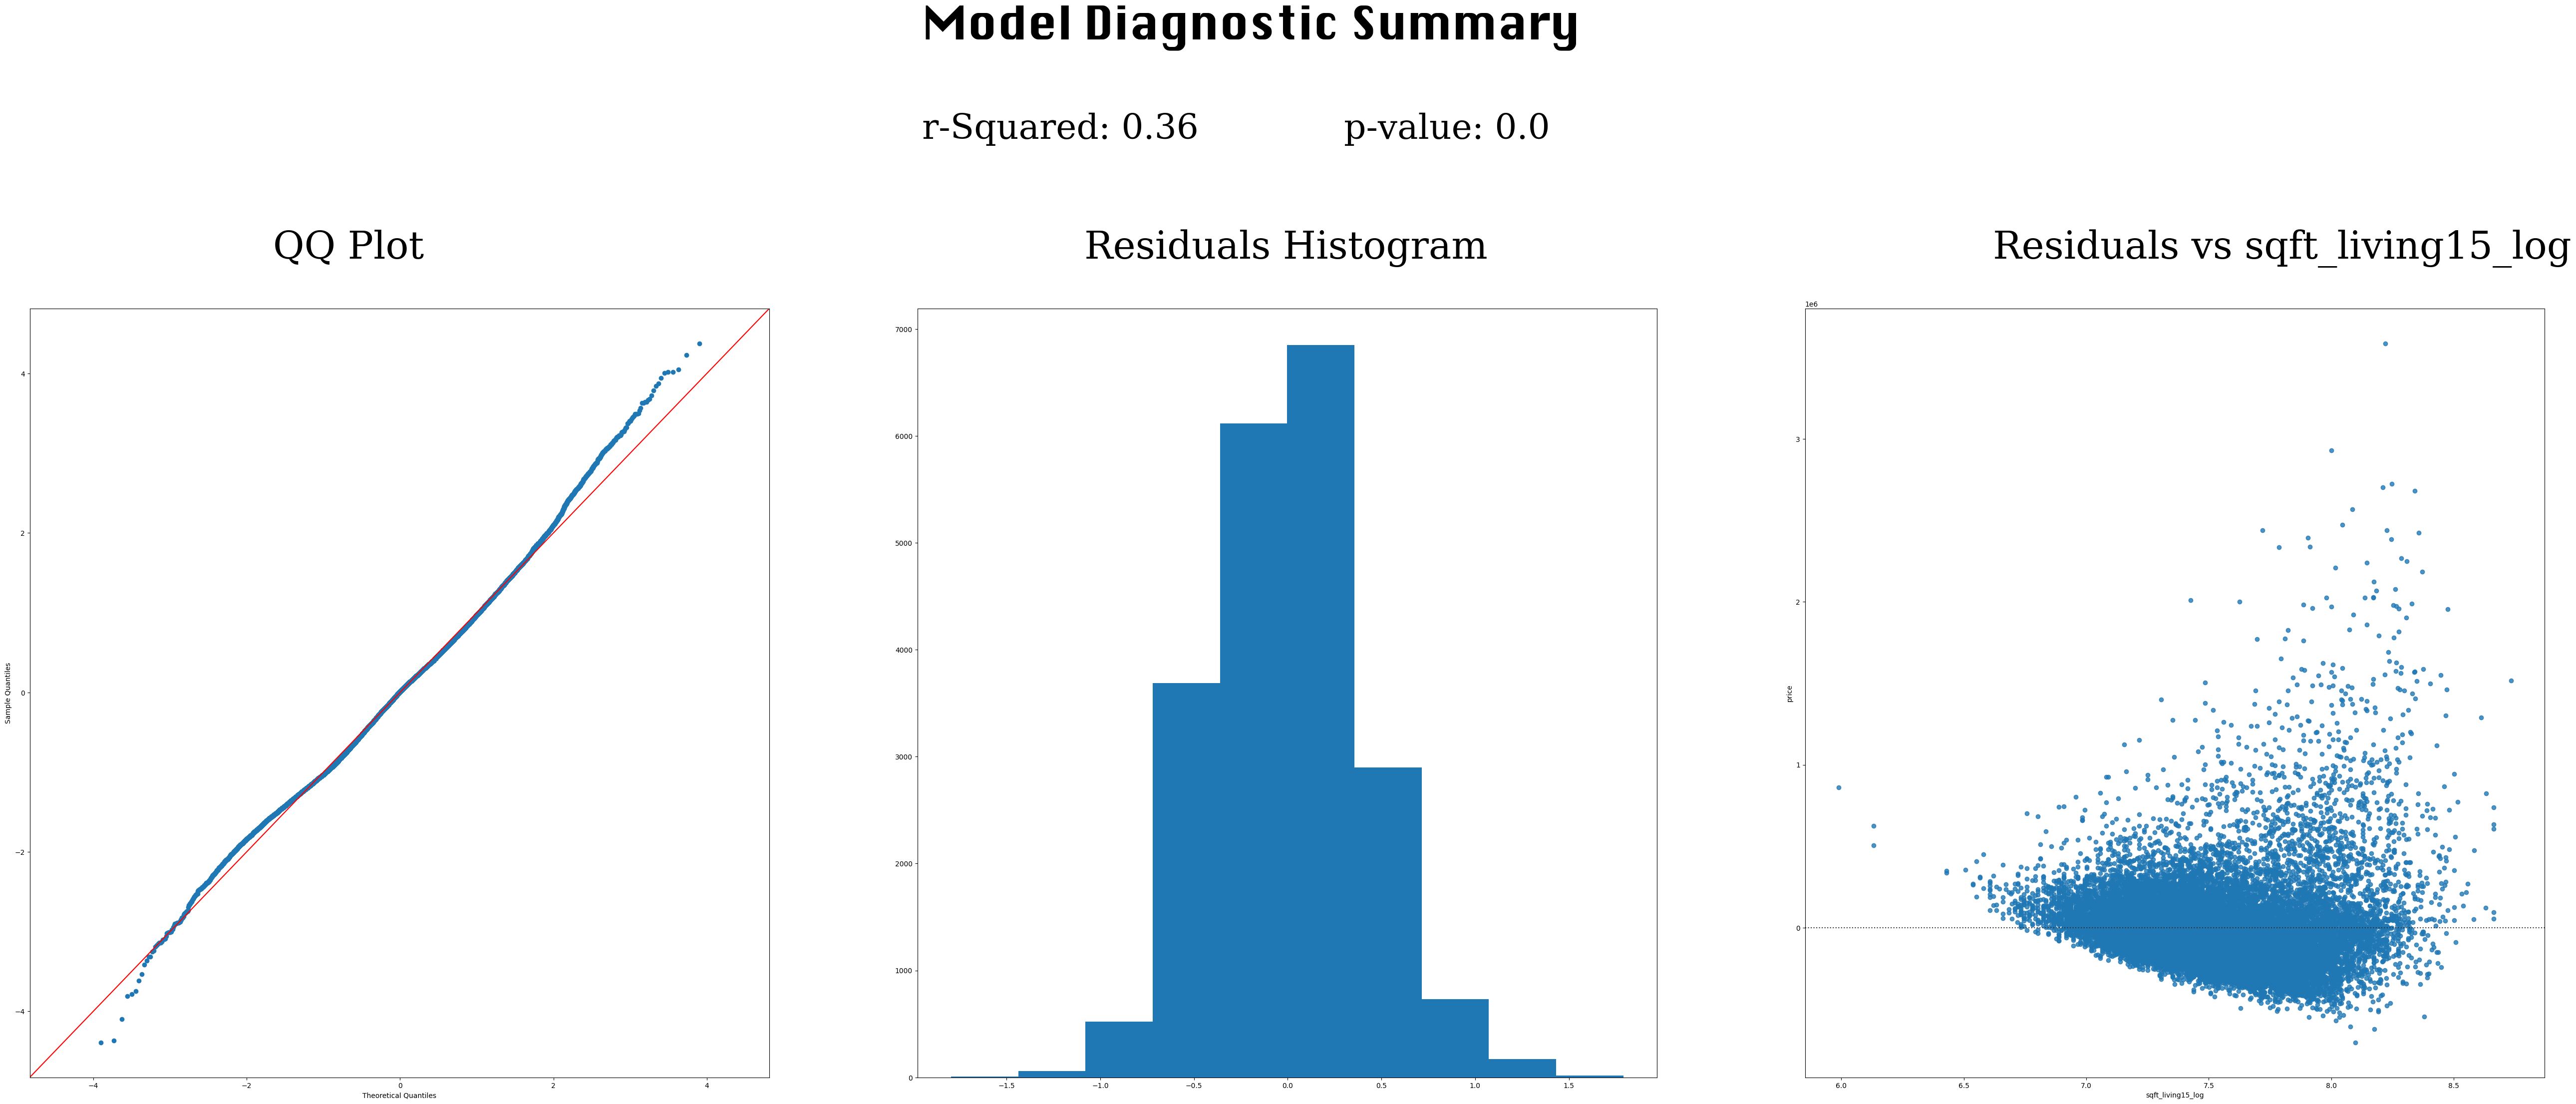

In [166]:
f = "price_log~sqft_living15_log"
sqft15_model = smf.ols(formula=f, data=house).fit()
model_diagnostic(sqft15_model, house['sqft_living15_log'], 'sqft_living15_log', price)

# check the variable--'bathroom'&'grade'

<Figure size 640x480 with 0 Axes>

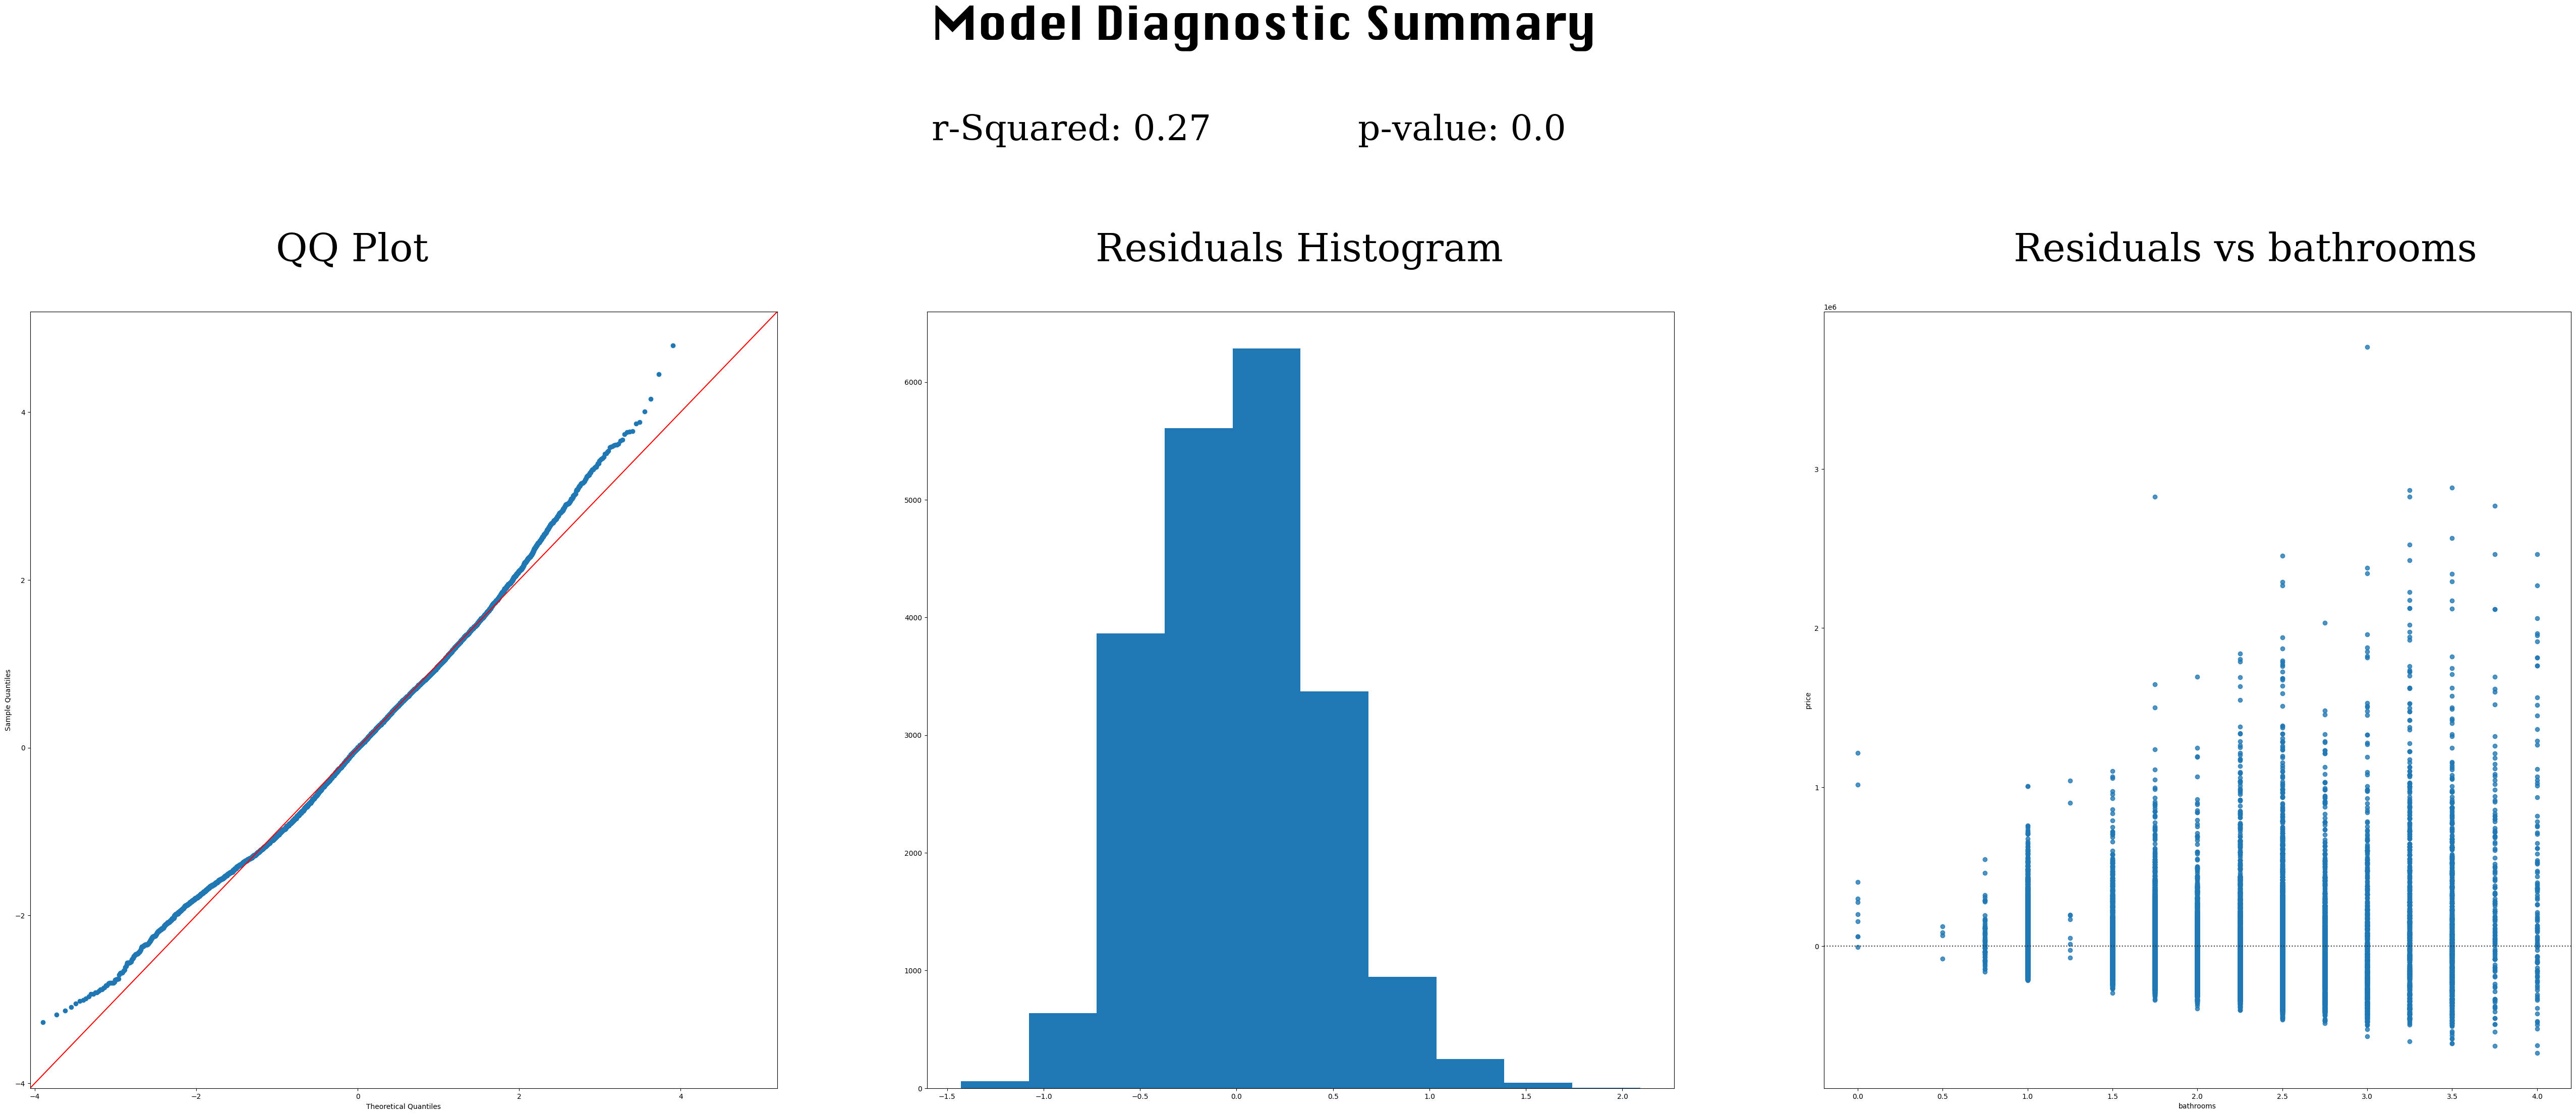

In [167]:
f = "price_log~bathrooms"
bath_model = smf.ols(formula=f, data=house).fit()
model_diagnostic(bath_model, house['bathrooms'], 'bathrooms', price)

<Figure size 640x480 with 0 Axes>

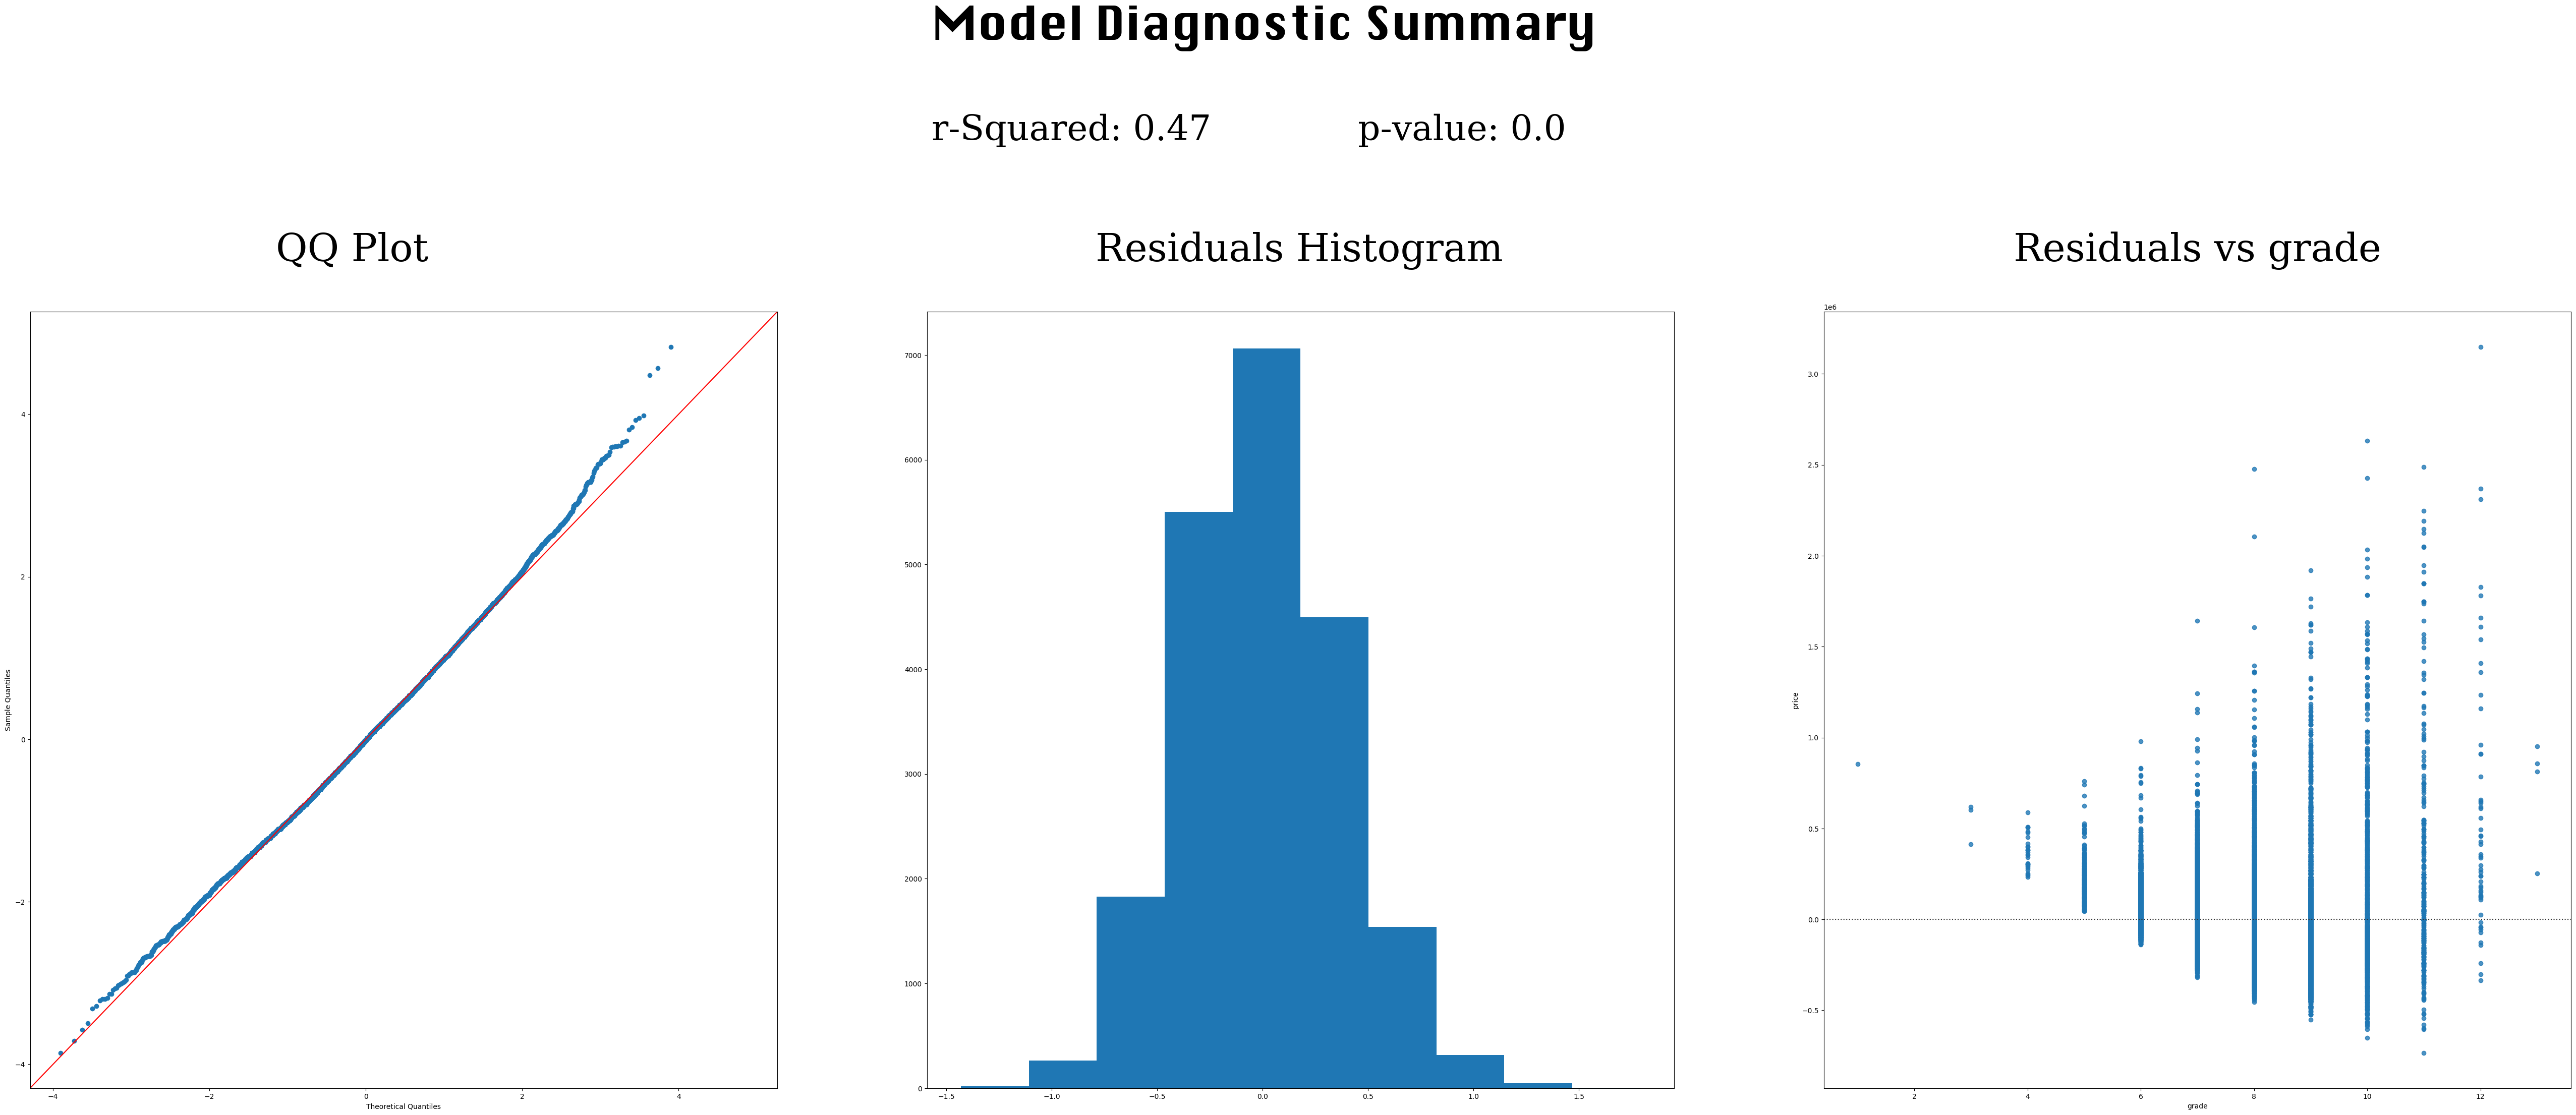

In [168]:
f = 'price_log~grade'
grade_model = smf.ols(formula=f, data=house).fit()
model_diagnostic(grade_model, house['grade'], 'grade', price)

# After we log transformed the variables, we can try to build the first multiple regression model.
# we pick the four variables that had the highest correlations with price 

In [169]:
results = ols("price_log ~ grade + sqft_living_log + bathrooms + sqft_living15_log ", data=house).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     5872.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:39:07   Log-Likelihood:                -7800.4
No. Observations:               21071   AIC:                         1.561e+04
Df Residuals:                   21066   BIC:                         1.565e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.5517      0.07

# the R squared is 0.527, P-value is 0.0,not bad.

In [170]:
"y_hat= 7.5517+0.1874grade+0.3591sqft_living-0.0275bathrooms+0.1861sqft_living"

'y_hat= 7.5517+0.1874grade+0.3591sqft_living_log-0.0275bathrooms+0.1861sqft_living_log'

In [172]:
pred_vals=results.predict(house[['grade','sqft_living_log','bathrooms','sqft_living15_log']])

In [173]:
pred_vals

0        12.716209
1        13.004537
2        12.507294
3        12.846190
4        13.057922
           ...    
21608    12.980345
21609    13.161600
21610    12.619970
21611    12.981204
21612    12.619970
Length: 21071, dtype: float64

In [174]:
res=pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),house['price_log']],axis=1)

In [175]:
res

y_hat  price_log
0      12.716209  12.309982
1      13.004537  13.195614
2      12.507294  12.100712
3      12.846190  13.311329
4      13.057922  13.142166
...          ...        ...
21608  12.980345  12.793859
21609  13.161600  12.899220
21610  12.619970  12.904459
21611  12.981204  12.899220
21612  12.619970  12.691580

[21071 rows x 2 columns]

In [176]:
res['error'] = res['y_hat'] - res['price_log']

In [177]:
res.head()

y_hat  price_log     error
0  12.716209  12.309982  0.406227
1  13.004537  13.195614 -0.191077
2  12.507294  12.100712  0.406582
3  12.846190  13.311329 -0.465139
4  13.057922  13.142166 -0.084244

# let's evaluate the error of the model to see how does it perform.

In [178]:
res['sq_error'] = res['error']**2

In [179]:
np.sqrt(res['sq_error'].mean())

0.3503780239984789

(array([5.000e+00, 5.900e+01, 4.340e+02, 1.764e+03, 4.211e+03, 6.139e+03,
        5.013e+03, 2.799e+03, 5.980e+02, 4.900e+01]),
 array([-1.51032997, -1.24326102, -0.97619207, -0.70912312, -0.44205417,
        -0.17498522,  0.09208373,  0.35915268,  0.62622163,  0.89329058,
         1.16035953]),
 <BarContainer object of 10 artists>)

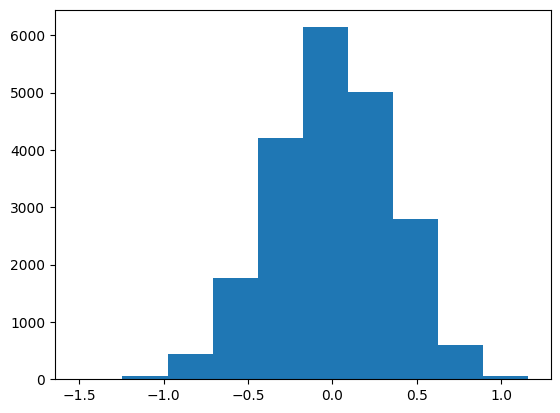

In [180]:
plt.hist(res['error'])

(array([  52.,  325., 2242., 5501., 6594., 4365., 1399.,  459.,  112.,
          22.]),
 array([11.22524339, 11.63443311, 12.04362282, 12.45281253, 12.86200224,
        13.27119196, 13.68038167, 14.08957138, 14.49876109, 14.90795081,
        15.31714052]),
 <BarContainer object of 10 artists>)

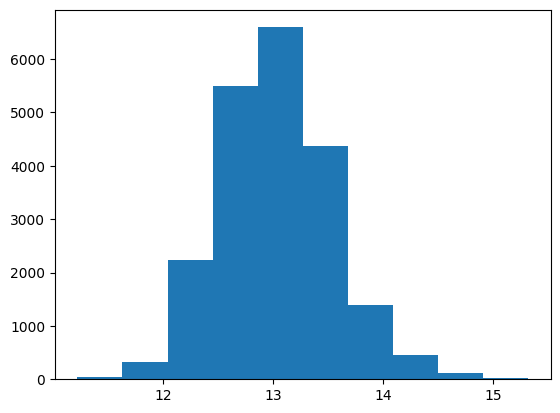

In [181]:
plt.hist(house['price_log'])

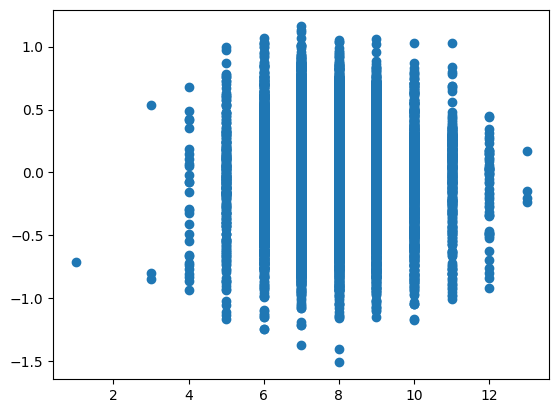

In [182]:
plt.scatter(house['grade'],res['error'])

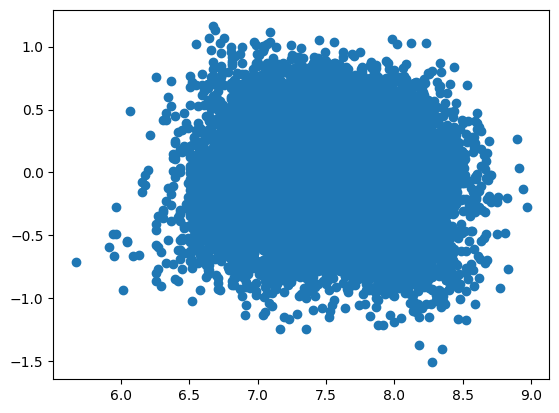

In [183]:
plt.scatter(house['sqft_living_log'],res['error'])

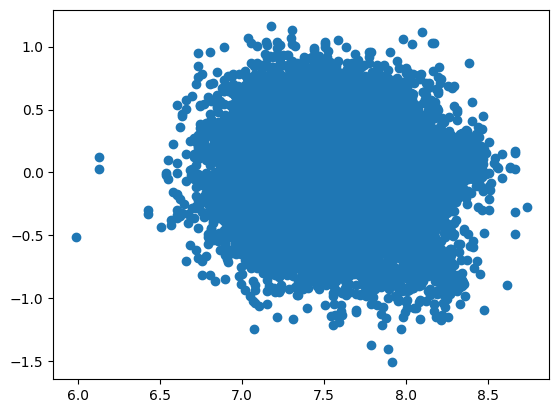

In [184]:
plt.scatter(house['sqft_living15_log'],res['error'])

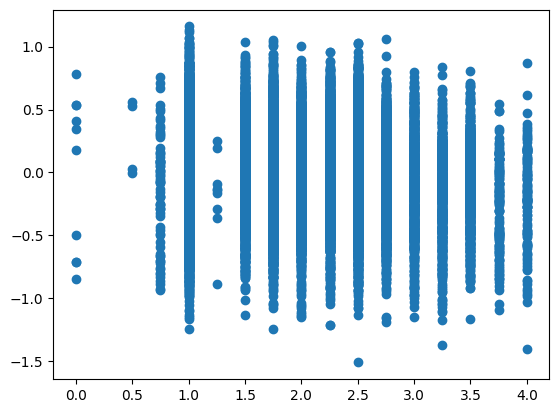

In [185]:
plt.scatter(house['bathrooms'],res['error'])

((array([-3.99101724, -3.77548693, -3.65757684, ...,  3.65757684,
          3.77548693,  3.99101724]),
  array([-1.51032997, -1.40155852, -1.37122636, ...,  1.114149  ,
          1.13477429,  1.16035953])),
 (0.3501681050347038, -6.703905909836273e-14, 0.9992188276321102))

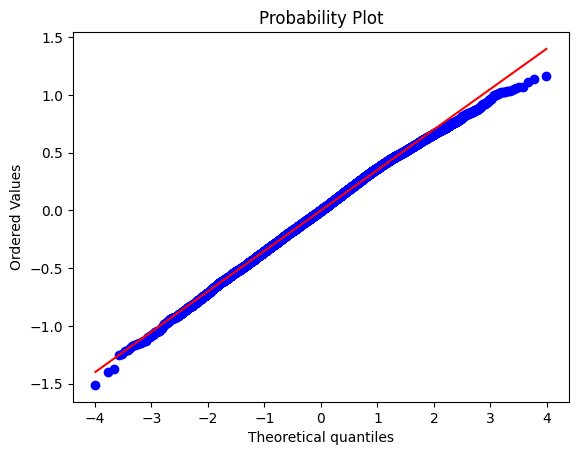

In [186]:
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)

# the PP plot seems good.

In [187]:
infl = results.get_influence()
print(infl.summary_frame())

       dfb_Intercept  dfb_grade  dfb_sqft_living_log  dfb_bathrooms   
0          -0.004554  -0.006059             0.000405       0.009252  \
1          -0.001882  -0.004640             0.006670      -0.000623   
2           0.008199   0.008638             0.025757      -0.002270   
3           0.012649  -0.008557             0.001719       0.018642   
4           0.000792   0.001253            -0.000814      -0.000074   
...              ...        ...                  ...            ...   
21608      -0.005874  -0.003173             0.004038      -0.004480   
21609      -0.001276  -0.000305            -0.002271      -0.001650   
21610       0.007801   0.008219             0.000722      -0.007986   
21611      -0.002799  -0.001488             0.001147      -0.001777   
21612       0.001964   0.002069             0.000182      -0.002010   

       dfb_sqft_living15_log       cooks_d  standard_resid  hat_diag   
0                   0.003836  5.016961e-05       -1.159367  0.000187  \
1  

In [188]:
infl.summary_frame()

dfb_Intercept  dfb_grade  dfb_sqft_living_log  dfb_bathrooms   
0          -0.004554  -0.006059             0.000405       0.009252  \
1          -0.001882  -0.004640             0.006670      -0.000623   
2           0.008199   0.008638             0.025757      -0.002270   
3           0.012649  -0.008557             0.001719       0.018642   
4           0.000792   0.001253            -0.000814      -0.000074   
...              ...        ...                  ...            ...   
21608      -0.005874  -0.003173             0.004038      -0.004480   
21609      -0.001276  -0.000305            -0.002271      -0.001650   
21610       0.007801   0.008219             0.000722      -0.007986   
21611      -0.002799  -0.001488             0.001147      -0.001777   
21612       0.001964   0.002069             0.000182      -0.002010   

       dfb_sqft_living15_log       cooks_d  standard_resid  hat_diag   
0                   0.003836  5.016961e-05       -1.159367  0.000187  \
1                  -0.003342  1.437932e-05        0.545346  0.000242   
2                  -0.034239  3.073960e-04       -1.160933  0.001139   
3                  -0.011873  1.331769e-04        1.327629  0.000378   
4                  -0.000188  9.164907e-07        0.240417  0.000079   
...                      ...           ...             ...       ...   
21608               0.002409  1.145220e-05       -0.532231  0.000202   
21609               0.003420  9.744227e-06       -0.748794  0.000087   
21610              -0.008505  4.968846e-05        0.812005  0.000377   
21611               0.001852  2.388123e-06       -0.233986  0.000218   
21612              -0.002141  3.148328e-06        0.204395  0.000377   

       dffits_internal  student_resid    dffits  
0            -0.015838      -1.159377 -0.015838  
1             0.008479       0.545336  0.008479  
2            -0.039204      -1.160942 -0.039205  
3             0.025805       1.327653  0.025805  
4             0.002141       0.240412  0.002141  
...                ...            ...       ...  
21608        -0.007567      -0.532222 -0.007567  
21609        -0.006980      -0.748786 -0.006980  
21610         0.015762       0.811998  0.015762  
21611        -0.003456      -0.233981 -0.003455  
21612         0.003968       0.204391  0.003967  

[21071 rows x 11 columns]

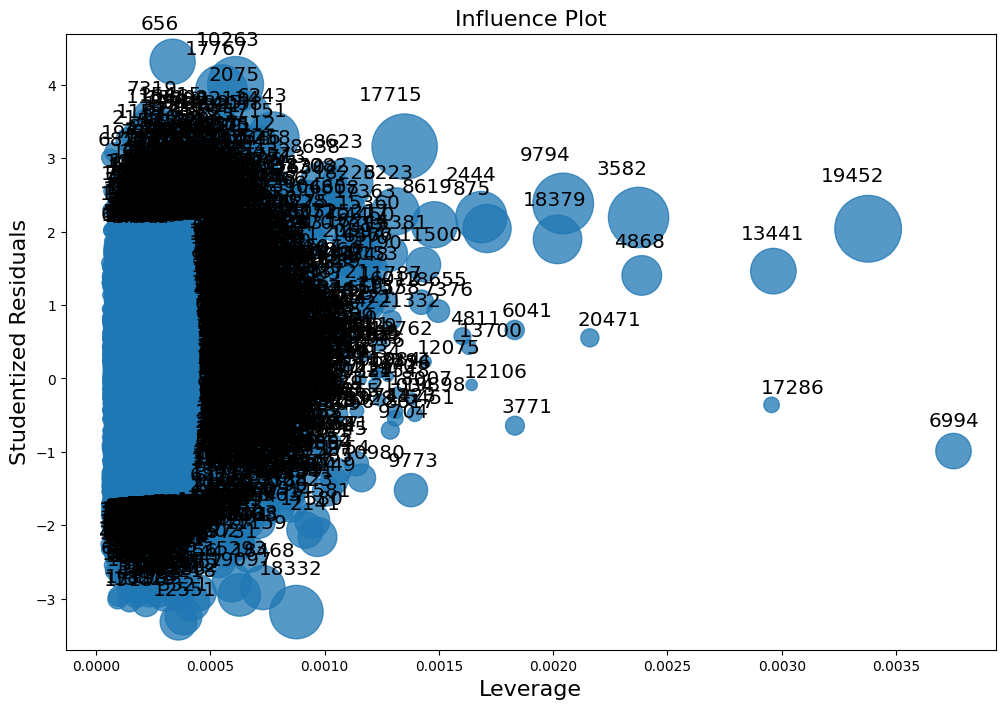

In [189]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

# we can drop those bumbles which located on the right-top and also bigger.

In [190]:
house=house.drop([9794,18379,3582,4868,13441,19452],axis=0)

# we can try to build 2nd model by adding view since it has correlated with price without strong relationship with sqrt_living

In [197]:
house['sqft_above_log']=np.log(house['sqft_above'])
results = ols("price_log ~ grade + sqft_living_log + bathrooms + sqft_living15_log + view", data=house).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     5134.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:16:10   Log-Likelihood:                -7291.2
No. Observations:               21065   AIC:                         1.459e+04
Df Residuals:                   21059   BIC:                         1.464e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.9672      0.07

# the R-squared is bigger. Let's move to next step to see the error.

In [198]:
"y_hat = 7.9672 + 0.1812 grade + 0.3458sqft_living_log - 0.0206 bathrooms+0.1455sqft_living15_log+0.1055view"

'y_hat = 7.9672 + 0.1812 grade + 0.3458sqft_living_log - 0.0206 bathrooms+0.1455sqft_living15_log+0.1055view'

In [199]:
pred_vals = results.predict(house[['grade','sqft_living_log','bathrooms','sqft_living15_log','view']])

In [200]:
pred_vals

0        12.708907
1        12.986073
2        12.483126
3        12.845280
4        13.034593
           ...    
21608    12.968283
21609    13.136810
21610    12.623962
21611    12.971866
21612    12.623962
Length: 21065, dtype: float64

In [201]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),house['price_log']], axis=1)

In [202]:
res

y_hat  price_log
0      12.708907  12.309982
1      12.986073  13.195614
2      12.483126  12.100712
3      12.845280  13.311329
4      13.034593  13.142166
...          ...        ...
21608  12.968283  12.793859
21609  13.136810  12.899220
21610  12.623962  12.904459
21611  12.971866  12.899220
21612  12.623962  12.691580

[21065 rows x 2 columns]

In [204]:
res['error'] = res['y_hat'] - res['price_log']
res['sq_error'] = res['error']**2
np.sqrt(res['sq_error'].mean())   # even smaller

0.3420468151102893

(array([  35.,  247., 1088., 2933., 5349., 5277., 3928., 1821.,  342.,
          45.]),
 array([-1.24502463, -1.00459288, -0.76416112, -0.52372937, -0.28329761,
        -0.04286586,  0.19756589,  0.43799765,  0.6784294 ,  0.91886116,
         1.15929291]),
 <BarContainer object of 10 artists>)

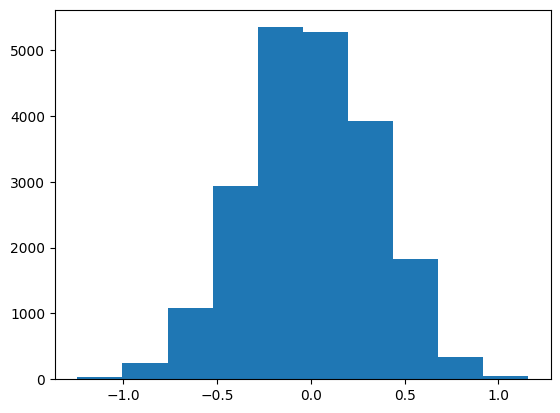

In [205]:
plt.hist(res['error'])

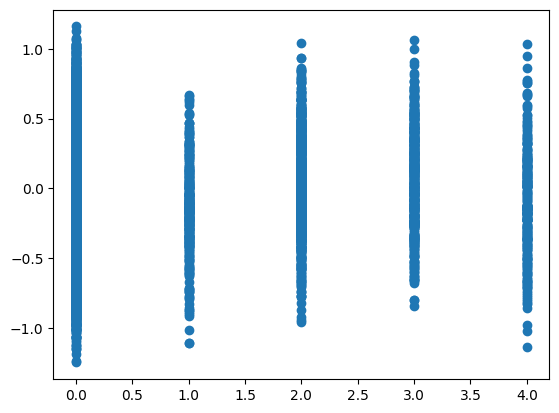

In [206]:
plt.scatter(house['view'],res['error'])

((array([-3.99094971, -3.77541595, -3.65750383, ...,  3.65750383,
          3.77541595,  3.99094971]),
  array([-1.24502463, -1.23735819, -1.18184487, ...,  1.08031713,
          1.12831372,  1.15929291])),
 (0.3418990288217158, 7.630653736080075e-15, 0.9993858069417367))

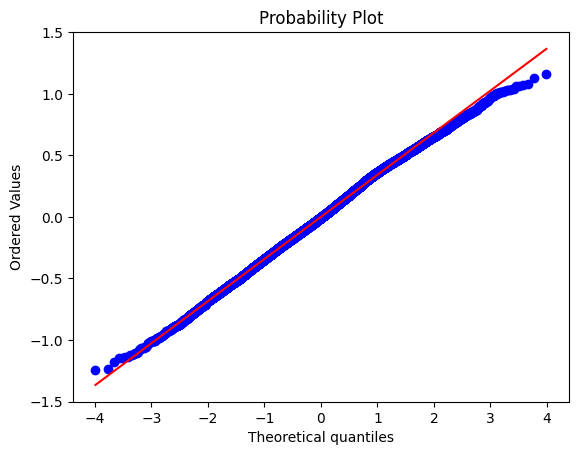

In [207]:
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)  # seems a little..little better

In [208]:
infl = results.get_influence()
print(infl.summary_frame())

       dfb_Intercept  dfb_grade  dfb_sqft_living_log  dfb_bathrooms   
0          -0.004375  -0.006124             0.000369       0.009327  \
1          -0.002253  -0.005107             0.007540      -0.000752   
2           0.008233   0.008375             0.024927      -0.002176   
3           0.012787  -0.008718             0.001808       0.019100   
4           0.000902   0.001678            -0.001031      -0.000127   
...              ...        ...                  ...            ...   
21608      -0.005445  -0.003071             0.003825      -0.004261   
21609      -0.000895  -0.000406            -0.002195      -0.001450   
21610       0.007814   0.008281             0.000754      -0.008052   
21611      -0.002471  -0.001364             0.001021      -0.001601   
21612       0.001884   0.001996             0.000182      -0.001941   

       dfb_sqft_living15_log  dfb_view   cooks_d  standard_resid  hat_diag   
0                   0.003749  0.000773  0.000042       -1.166230  0.0

In [209]:
infl.summary_frame()

dfb_Intercept  dfb_grade  dfb_sqft_living_log  dfb_bathrooms   
0          -0.004375  -0.006124             0.000369       0.009327  \
1          -0.002253  -0.005107             0.007540      -0.000752   
2           0.008233   0.008375             0.024927      -0.002176   
3           0.012787  -0.008718             0.001808       0.019100   
4           0.000902   0.001678            -0.001031      -0.000127   
...              ...        ...                  ...            ...   
21608      -0.005445  -0.003071             0.003825      -0.004261   
21609      -0.000895  -0.000406            -0.002195      -0.001450   
21610       0.007814   0.008281             0.000754      -0.008052   
21611      -0.002471  -0.001364             0.001021      -0.001601   
21612       0.001884   0.001996             0.000182      -0.001941   

       dfb_sqft_living15_log  dfb_view   cooks_d  standard_resid  hat_diag   
0                   0.003749  0.000773  0.000042       -1.166230  0.000187  \
1                  -0.003648 -0.001057  0.000015        0.612597  0.000245   
2                  -0.033277  0.002010  0.000241       -1.118505  0.001157   
3                  -0.012130 -0.000119  0.000117        1.362595  0.000378   
4                  -0.000177 -0.000672  0.000001        0.314465  0.000084   
...                      ...       ...       ...             ...       ...   
21608               0.002241  0.000566  0.000009       -0.509919  0.000203   
21609               0.003017  0.001606  0.000007       -0.694547  0.000093   
21610              -0.008588  0.000247  0.000042        0.820091  0.000377   
21611               0.001659  0.000191  0.000002       -0.212379  0.000219   
21612              -0.002070  0.000059  0.000002        0.197696  0.000377   

       dffits_internal  student_resid    dffits  
0            -0.015951      -1.166240 -0.015951  
1             0.009592       0.612588  0.009592  
2            -0.038060      -1.118512 -0.038061  
3             0.026505       1.362622  0.026505  
4             0.002880       0.314458  0.002880  
...                ...            ...       ...  
21608        -0.007274      -0.509911 -0.007274  
21609        -0.006681      -0.694538 -0.006681  
21610         0.015932       0.820084  0.015932  
21611        -0.003145      -0.212374 -0.003145  
21612         0.003841       0.197692  0.003841  

[21065 rows x 12 columns]

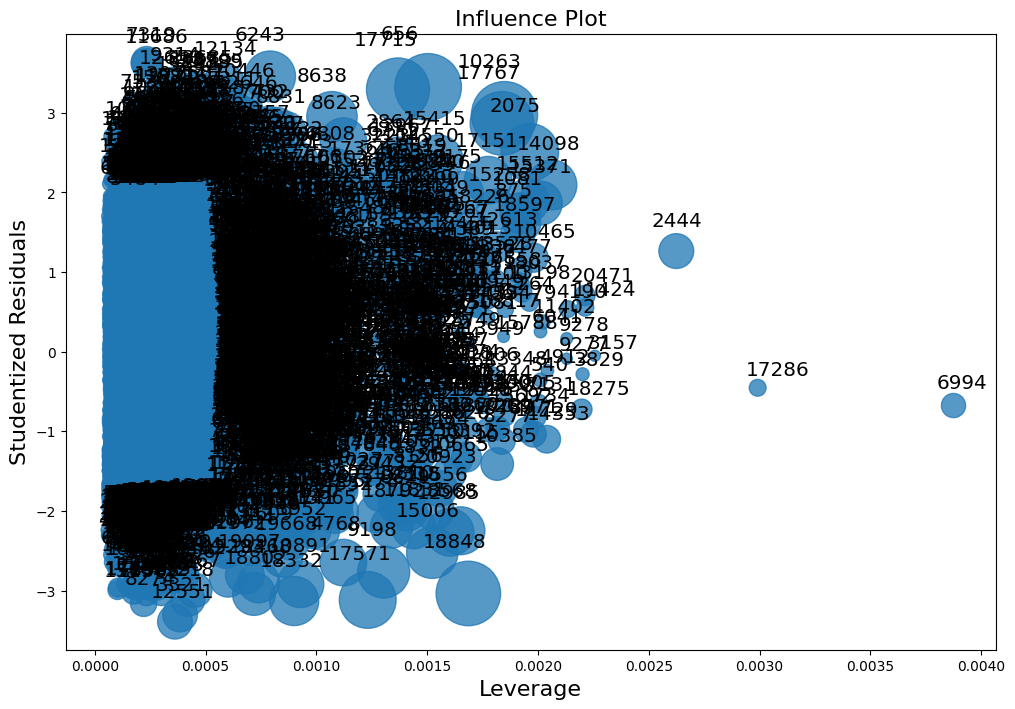

In [210]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

# We should choose the 2nd model. Let's validate the model using the Linear regression,ridge_regression and lasso regression:

In [230]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.metrics import mean_squared_error

In [231]:
house.head()

id       date     price  bedrooms  bathrooms  sqft_living   
0  7129300520 2014-10-13  221900.0         3       1.00         1180  \
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_living15  sqft_lot15    two   
0      5650     1.0           0     0  ...           1340        5650  False  \
1      7242     2.0           0     0  ...           1690        7639  False   
2     10000     1.0           0     0  ...           2720        8062  False   
3      5000     1.0           0     0  ...           1360        5000  False   
4      8080     1.0           0     0  ...           1800        7503  False   

   three   four   five  price_log  sqft_living_log  sqft_living15_log   
0   True  False  False  12.309982         7.073270           7.200425  \
1   True  False  False  13.195614         7.851661           7.432484   
2   True  False  False  12.100712         6.646391           7.908387   
3  False  False   True  13.311329         7.580700           7.215240   
4   True  False  False  13.142166         7.426549           7.495542   

   sqft_above_log  
0        7.073270  
1        7.682482  
2        6.646391  
3        6.956545  
4        7.426549  

[5 rows x 29 columns]

In [232]:
# separate features and target
categorical_features = ['view','grade']
numerical_features = ['sqft_living_log','sqft_living15_log', 'bathrooms']
target = 'price_log'

In [233]:
X_train, X_test, y_train, y_test = train_test_split(house[categorical_features + numerical_features]
                                                    ,house[target],
                                                    test_size = 0.3, random_state=1234)

In [234]:
# define transformers
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [235]:
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [236]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [237]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['view', 'grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living_log',
                                                   'sqft_living15_log',
                                                   'bathrooms'])])),
                ('regressor', LinearRegression())])

In [238]:
pred = linear_regression.predict(X_test)
pred

array([12.79396202, 13.67174353, 13.5604918 , ..., 13.16265538,
       12.91524669, 13.72054535])

In [239]:
np.sqrt(mean_squared_error(pred,y_test))

0.33987616575605817

In [240]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [241]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['view', 'grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living_log',
                                                   'sqft_living15_log',
                                                   'bathrooms'])])),
                ('regressor', Ridge(alpha=3.0))])

In [242]:
pred_ridge = ridge_regression.predict(X_test)

In [243]:
np.sqrt(mean_squared_error(pred_ridge,y_test))

0.33925901598697333

In [244]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [245]:
lasso_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['view', 'grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living_log',
                                                   'sqft_living15_log',
                                                   'bathrooms'])])),
                ('regressor', Lasso())])

In [247]:
lasso_pred = lasso_regression.predict(X_test)

In [248]:
np.sqrt(mean_squared_error(lasso_pred, y_test))

0.5113112346214244